Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
import pandas_profiling
from scipy import stats
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
%matplotlib inline

In [2]:
# Read files
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

pandas_profiling.ProfileReport(train)

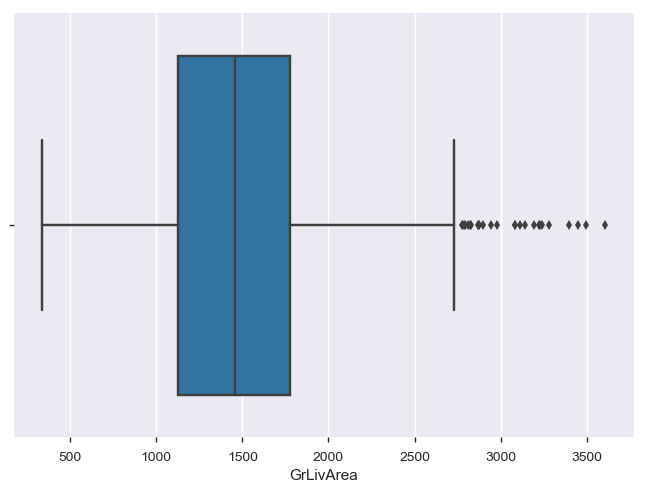

In [3]:
# From EDA obvious outliers
train = train[train.GrLivArea < 3627]
train.reset_index(drop=True, inplace=True)
import seaborn as sns
sns.boxplot(x=train['GrLivArea'])

#The predicted variable - Sales price Skew & kurtosis analysis

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 1.494437
Kurtosis: 3.416806


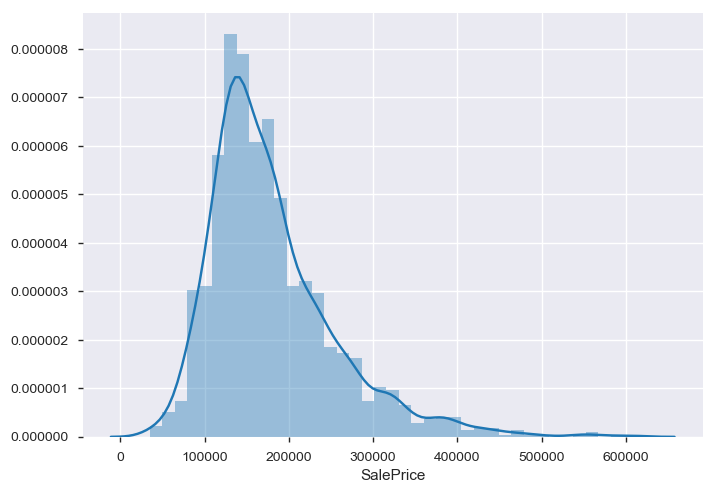

In [4]:
sns.distplot(train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())


 mu = 179845.50 and sigma = 75804.13



Text(0.5, 0.98, 'Before transformation')

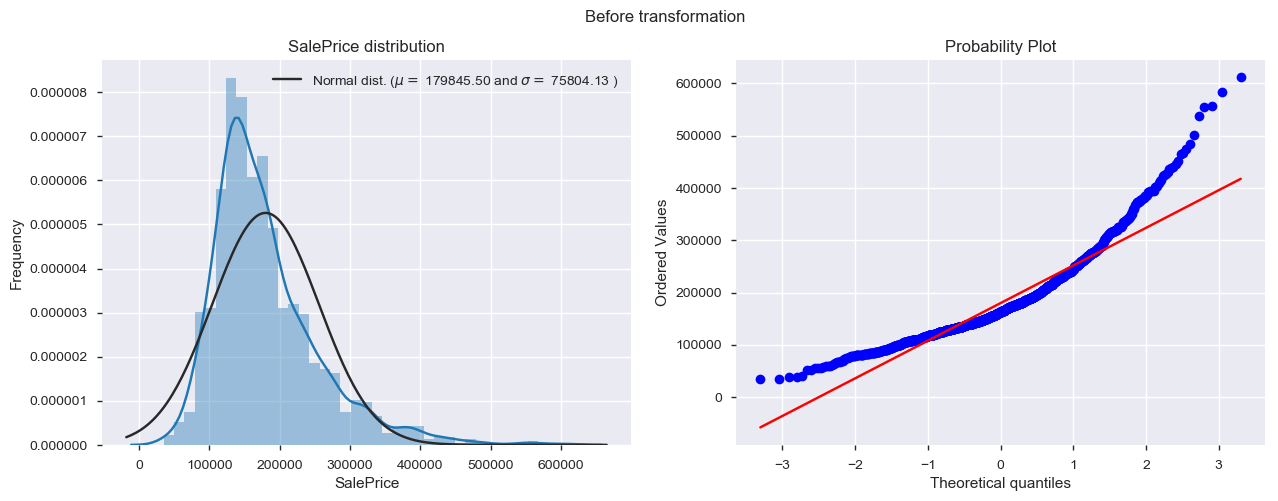

In [5]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

In [6]:
# Apply transformation
train.SalePrice = np.log1p(train.SalePrice)
y_train = train.SalePrice.values
y_train_orig = train.SalePrice
print(y_train.shape)
print(y_train_orig.shape)

(1455,)
(1455,)



 mu = 12.02 and sigma = 0.39



Text(0.5, 0.98, 'After transformation')

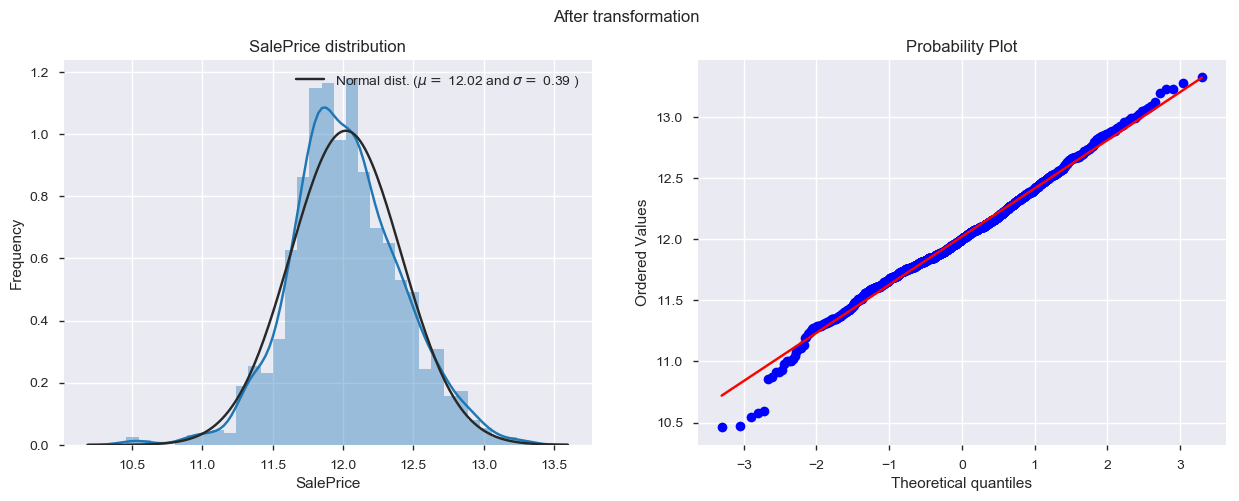

In [7]:

# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

In [8]:
#train.drop("SalePrice", axis = 1, inplace = True)
data_features = pd.concat((train, test),sort=False).reset_index(drop=True)
print(data_features.shape)

(2914, 80)


In [9]:
data_features_na = data_features.isnull().sum()
data_features_na = data_features_na[data_features_na>0]
data_features_na.sort_values(ascending=False,inplace=True)
data_features_na

PoolQC          2906
MiscFeature     2809
Alley           2716
Fence           2344
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64

In [10]:
print(data_features.dtypes)
data_features.describe(include='all')


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
count     2914.000     2910     2428.000   2914.000   2914   198     2914   
unique         nan        5          nan        nan      2     2        4   
top            nan       RL          nan        nan   Pave  Grvl      Reg   
freq           nan     2260          nan        nan   2902   120     1859   
mean        57.133      NaN       69.109  10124.854    NaN   NaN      NaN   
std         42.554      NaN       22.698   7793.083    NaN   NaN      NaN   
min         20.000      NaN       21.000   1300.000    NaN   NaN      NaN   
25%         20.000      NaN       59.000   7473.000    NaN   NaN      NaN   
50%         50.000      NaN       68.000   9450.000    NaN   NaN      NaN   
75%         70.000      NaN       80.000  11546.250    NaN   NaN      NaN   
max        190.000      NaN      313.000 215245.000    NaN   NaN      NaN   

       LandContour Utilities LotConfig    ...     PoolArea PoolQC  Fence  \
count         2914      2912      2914    ...     2914.000      8    570   
unique           4         2         5    ...          nan      3      4   
top            Lvl    AllPub    Inside    ...          nan     Ex  MnPrv   
freq          2619      2911      2132    ...          nan      3    328   
mean           NaN       NaN       NaN    ...        1.900    NaN    NaN   
std            NaN       NaN       NaN    ...       33.026    NaN    NaN   
min            NaN       NaN       NaN    ...        0.000    NaN    NaN   
25%            NaN       NaN       NaN    ...        0.000    NaN    NaN   
50%            NaN       NaN       NaN    ...        0.000    NaN    NaN   
75%            NaN       NaN       NaN    ...        0.000    NaN    NaN   
max            NaN       NaN       NaN    ...      800.000    NaN    NaN   

       MiscFeature   MiscVal   MoSold   YrSold  SaleType  SaleCondition  \
count          105  2914.000 2914.000 2914.000      2913           2914   
unique           4       nan      nan      nan         9              6   
top           Shed       nan      nan      nan        WD         Normal   
freq            95       nan      nan      nan      2522           2400   
mean           NaN    50.913    6.215 2007.794       NaN            NaN   
std            NaN   567.885    2.713    1.315       NaN            NaN   
min            NaN     0.000    1.000 2006.000       NaN            NaN   
25%            NaN     0.000    4.000 2007.000       NaN            NaN   
50%            NaN     0.000    6.000 2008.000       NaN            NaN   
75%            NaN     0.000    8.000 2009.000       NaN            NaN   
max            NaN 17000.000   12.000 2010.000       NaN            NaN   

        SalePrice  
count    1455.000  
unique        nan  
top           nan  
freq          nan  
mean       12.021  
std         0.395  
min        10.460  
25%        11.775  
50%        12.002  
75%        12.273  
max        13.324  

[11 rows x 80 columns]

#Replacing the missing data

In [11]:
#For numbers that have no significance and should actually be strings
#print(data_features[str_vars].dtypes)    
str_vars = ['MSSubClass','YrSold','MoSold']
for var in str_vars:
    data_features[var] = data_features[var].apply(str)
print(data_features[str_vars].dtypes)    

MSSubClass    object
YrSold        object
MoSold        object
dtype: object


In [12]:
# Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

common_vars = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']

for var in common_vars:
    data_features[var] = data_features[var].fillna(data_features[var].mode()[0])

In [13]:
# 'RL' is by far the most common value. So we can fill in missing values with 'RL'
data_features['MSZoning'] = data_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [14]:
# # data description says NA means "No Pool", majority of houses have no Pool at all in general.
# features[] = features["PoolQC"].fillna("None")
# Replacing missing data with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    data_features[col] = data_features[col].fillna('None')

In [15]:
# Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    data_features[col] = data_features[col].fillna(0)

# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_features['LotFrontage'] = data_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
print('Features size:', data_features.shape)

Features size: (2914, 80)


In [16]:
# data description says NA means typical
data_features['Functional'] = data_features['Functional'].fillna('Typ')

In [17]:
#missing data
total = data_features.isnull().sum().sort_values(ascending=False)
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total  Percent
SalePrice       1459    0.501
SaleCondition      0    0.000
RoofMatl           0    0.000
Exterior1st        0    0.000
Exterior2nd        0    0.000
MasVnrType         0    0.000
MasVnrArea         0    0.000
ExterQual          0    0.000
ExterCond          0    0.000
Foundation         0    0.000

#Splitting the data into categorial and numerical features

In [18]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = data_features.select_dtypes(include=['object']).columns
print(categorical_features)
numerical_features = data_features.select_dtypes(exclude = ["object"]).columns
print(numerical_features)

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
feat_num = data_features[numerical_features]
feat_cat = data_features[categorical_features]

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'B

#Box cox transform for skewd numerical data

In [19]:
# Plot skew value for each numerical value
from scipy.stats import skew 
skewness = feat_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal         21.928
PoolArea        18.699
LotArea         13.186
LowQualFinSF    12.078
3SsnPorch       11.366
KitchenAbvGr     4.298
BsmtFinSF2       4.142
EnclosedPorch    4.000
ScreenPorch      3.943
BsmtHalfBath     3.942
MasVnrArea       2.547
OpenPorchSF      2.529
WoodDeckSF       1.851
1stFlrSF         1.255
LotFrontage      1.094
BsmtFinSF1       0.975
GrLivArea        0.963
BsmtUnfSF        0.920
2ndFlrSF         0.838
TotRmsAbvGrd     0.750
Fireplaces       0.727
HalfBath         0.700
TotalBsmtSF      0.663
BsmtFullBath     0.624
OverallCond      0.569
BedroomAbvGr     0.329
GarageArea       0.218
OverallQual      0.178
FullBath         0.157
GarageCars      -0.219
YearRemodAdd    -0.449
YearBuilt       -0.598
GarageYrBlt     -3.902
SalePrice          nan
dtype: float64

In [20]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))

There are 27 skewed numerical features to Box Cox transform
Mean skewnees: 4.077266459821652


In [21]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    feat_num[feat] = boxcox1p(feat_num[feat], boxcox_normmax(feat_num[feat] + 1))
    data_features[feat] = boxcox1p(data_features[feat], boxcox_normmax(data_features[feat] + 1))
       
from scipy.stats import skew 
skewness.sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


MiscVal         21.928
PoolArea        18.699
LotArea         13.186
LowQualFinSF    12.078
3SsnPorch       11.366
KitchenAbvGr     4.298
BsmtFinSF2       4.142
EnclosedPorch    4.000
ScreenPorch      3.943
BsmtHalfBath     3.942
MasVnrArea       2.547
OpenPorchSF      2.529
WoodDeckSF       1.851
1stFlrSF         1.255
LotFrontage      1.094
BsmtFinSF1       0.975
GrLivArea        0.963
BsmtUnfSF        0.920
2ndFlrSF         0.838
TotRmsAbvGrd     0.750
Fireplaces       0.727
HalfBath         0.700
TotalBsmtSF      0.663
BsmtFullBath     0.624
OverallCond      0.569
YearBuilt       -0.598
GarageYrBlt     -3.902
dtype: float64

#Observe the correction. 
#We can see that a lot of parameters remained skewd. I suspect that's for variables that have a lot of 0.

In [22]:
skewness = feat_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print("There are {} skewed numerical features after Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))
skewness.sort_values(ascending=False)

There are 17 skewed numerical features after Box Cox transform
Mean skewnees: 3.5409058492275434


PoolArea        16.287
3SsnPorch        8.857
LowQualFinSF     8.488
MiscVal          5.235
BsmtHalfBath     3.790
KitchenAbvGr     3.776
ScreenPorch      3.151
BsmtFinSF2       2.577
EnclosedPorch    2.148
MasVnrArea       0.977
2ndFlrSF         0.892
WoodDeckSF       0.787
HalfBath         0.735
GarageYrBlt      0.701
OpenPorchSF      0.622
BsmtFullBath     0.618
Fireplaces       0.554
dtype: float64

#Creating features from the data
#Adding features at this section to be able to view them at the visualization section next 

In [23]:
# Calculating totals before droping less significant columns

#  Adding total sqfootage feature 
data_features['TotalSF']=data_features['TotalBsmtSF'] + data_features['1stFlrSF'] + data_features['2ndFlrSF']
#  Adding total bathrooms feature
data_features['Total_Bathrooms'] = (data_features['FullBath'] + (0.5 * data_features['HalfBath']) +
                               data_features['BsmtFullBath'] + (0.5 * data_features['BsmtHalfBath']))
#  Adding total porch sqfootage feature
data_features['Total_porch_sf'] = (data_features['OpenPorchSF'] + data_features['3SsnPorch'] +
                              data_features['EnclosedPorch'] + data_features['ScreenPorch'] +
                              data_features['WoodDeckSF'])

#Deleting features
#Features that cant be skewd or are unsignificant.

In [24]:
data_features['haspool'] = data_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasgarage'] = data_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasbsmt'] = data_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasfireplace'] = data_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


# Not normaly distributed can not be normalised and has no central tendecy
data_features = data_features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1)
# data_features = data_features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF',
#                          'PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch',
#                          'ScreenPorch','KitchenAbvGr','BsmtFinSF2','EnclosedPorch','LotFrontage'
#                          ,'BsmtUnfSF','GarageYrBlt'], axis=1)

print('data_features size:', data_features.shape)

data_features size: (2914, 82)


#Splitting the data back to train and test

In [25]:
train = data_features.iloc[:len(y_train), :]
test = data_features.iloc[len(y_train):, :]
print(['Train data shpe: ',train.shape,'Prediction on (Sales price) shape: ', y_train.shape,'Test shape: ', test.shape])

['Train data shpe: ', (1455, 82), 'Prediction on (Sales price) shape: ', (1455,), 'Test shape: ', (1459, 82)]


#Visually comparing data to sale prices
#One can observe the behaviour of the variables, locate outlier and more.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


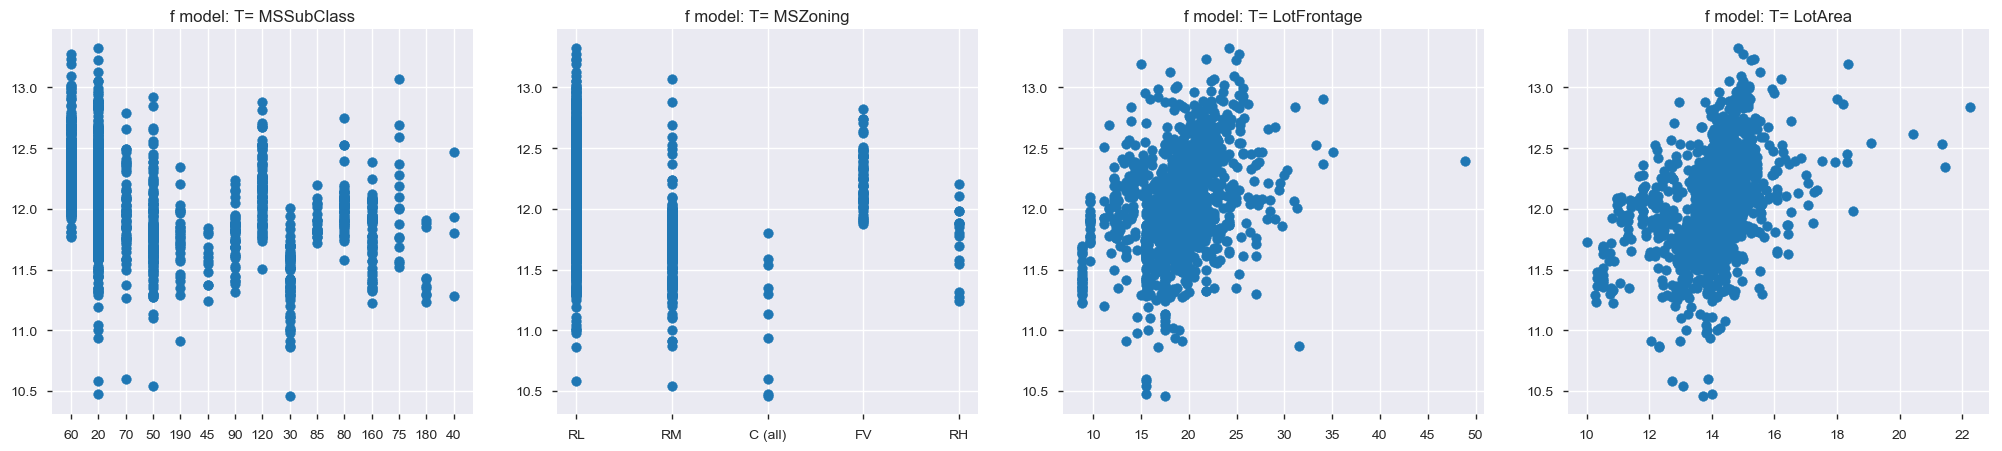

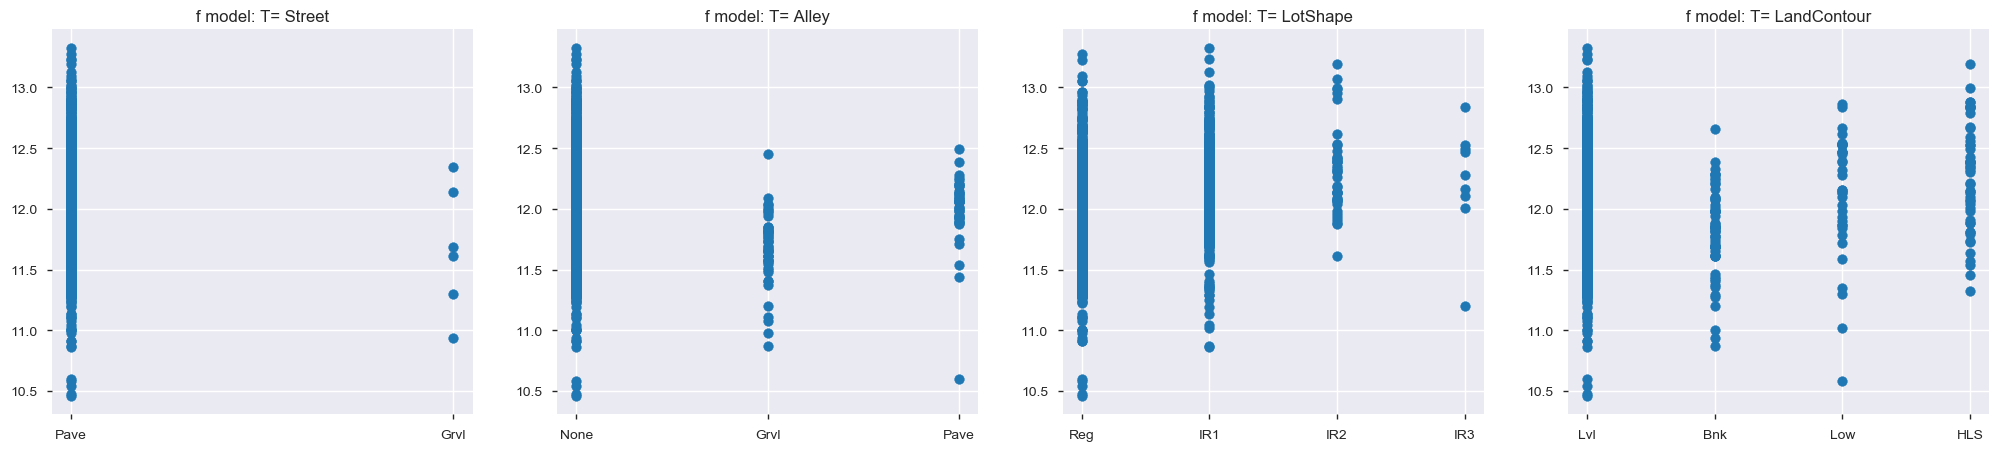

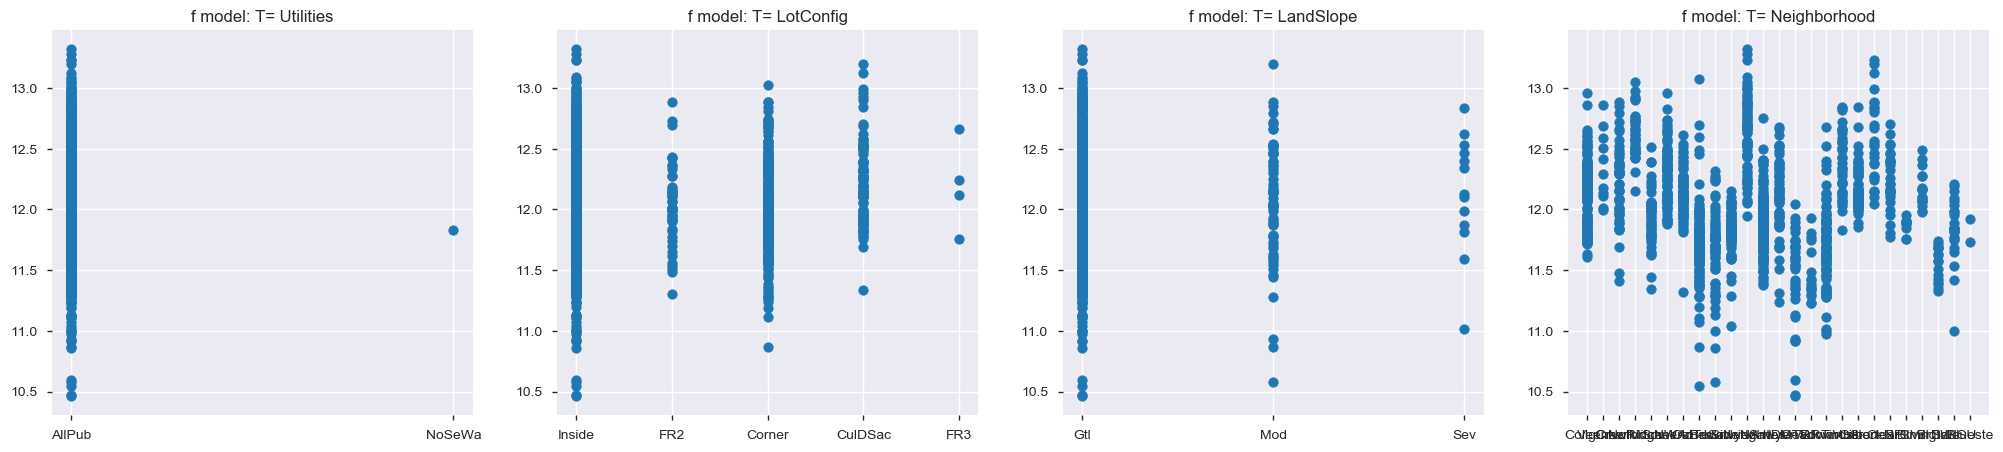

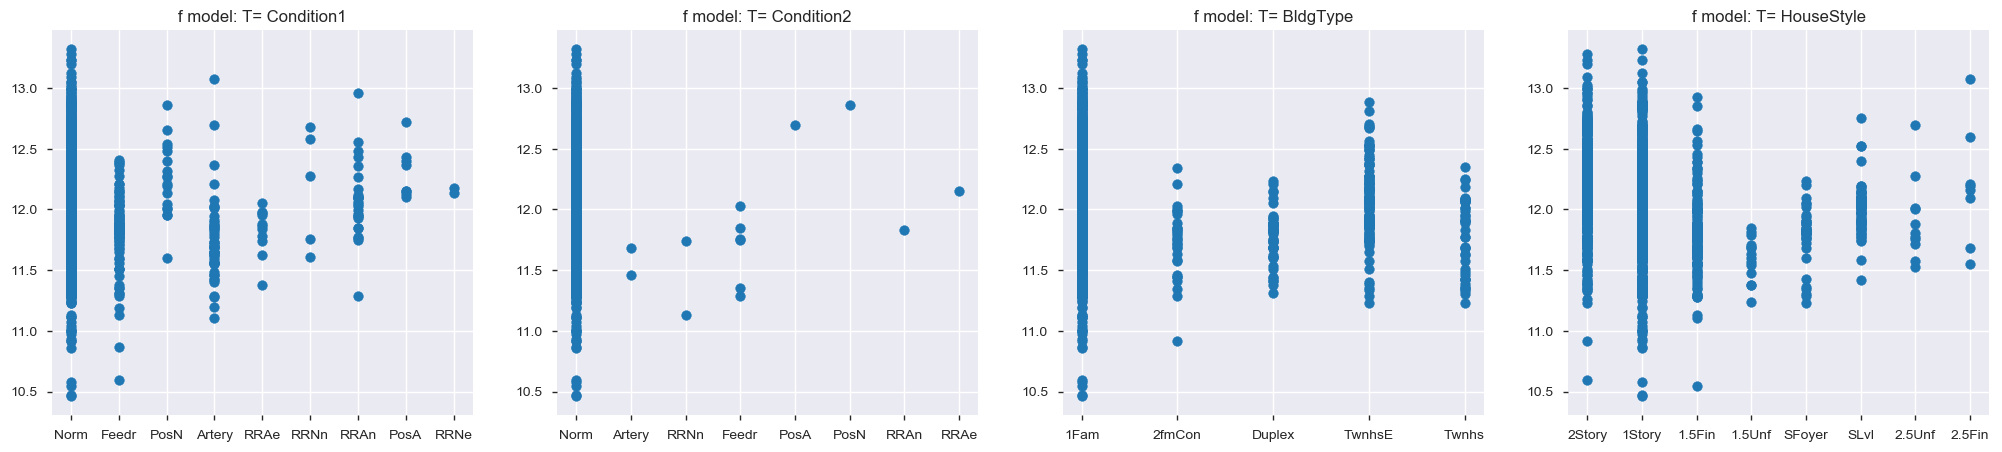

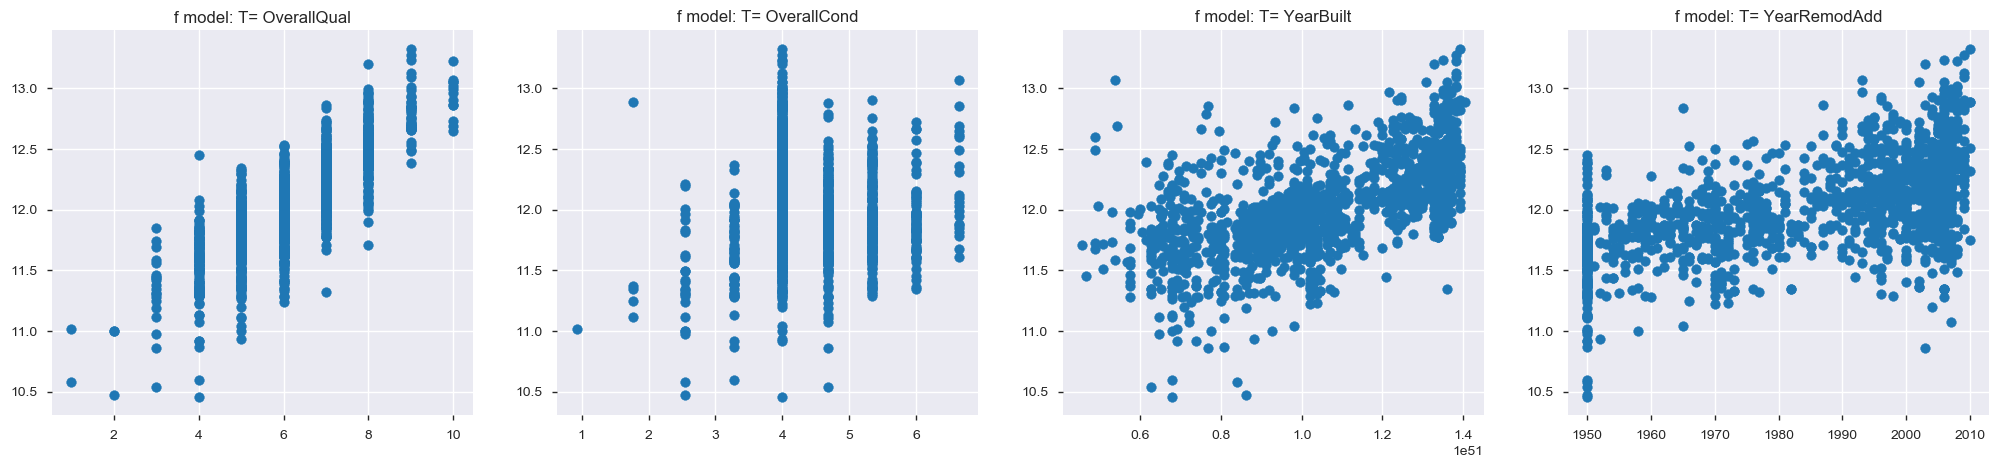

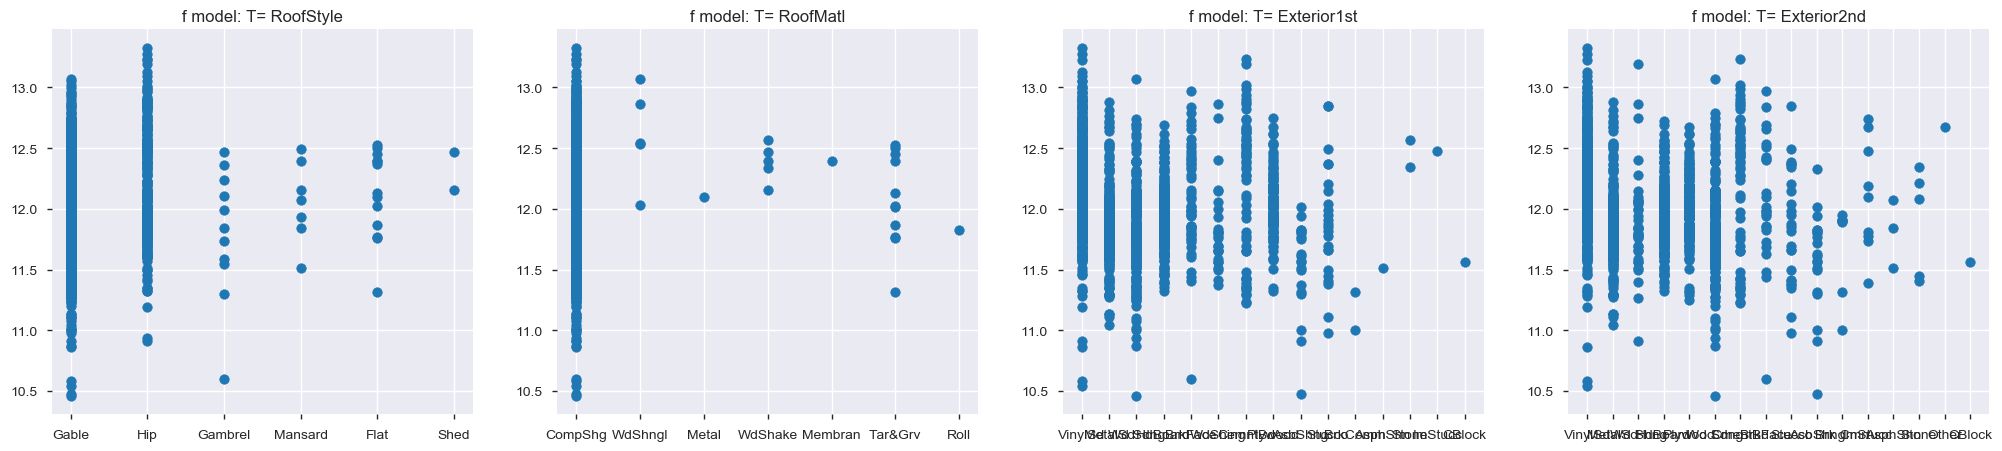

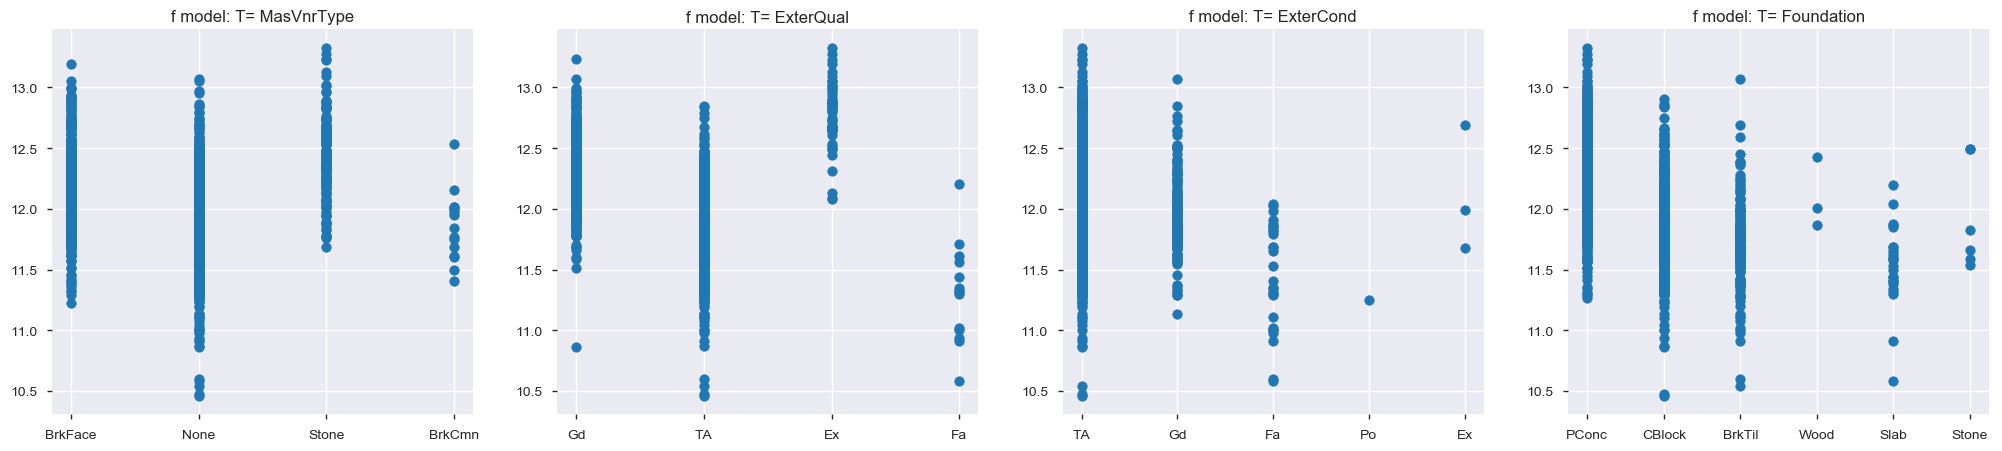

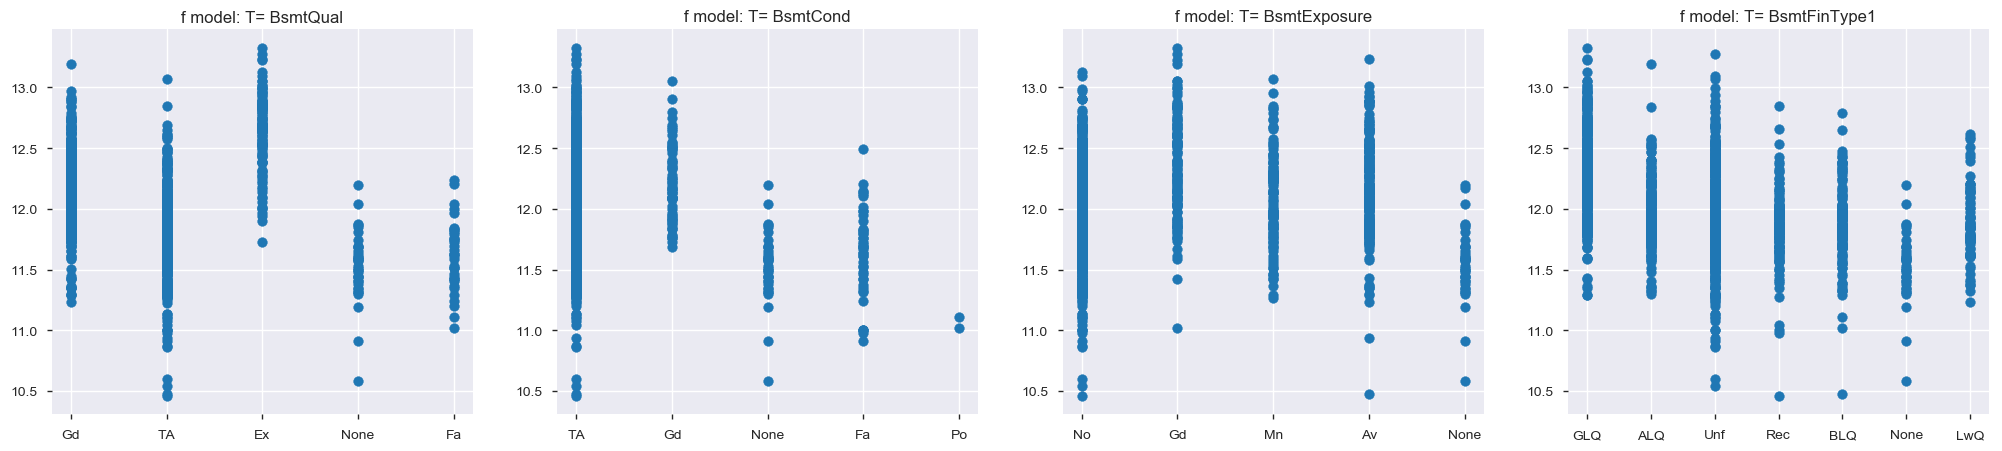

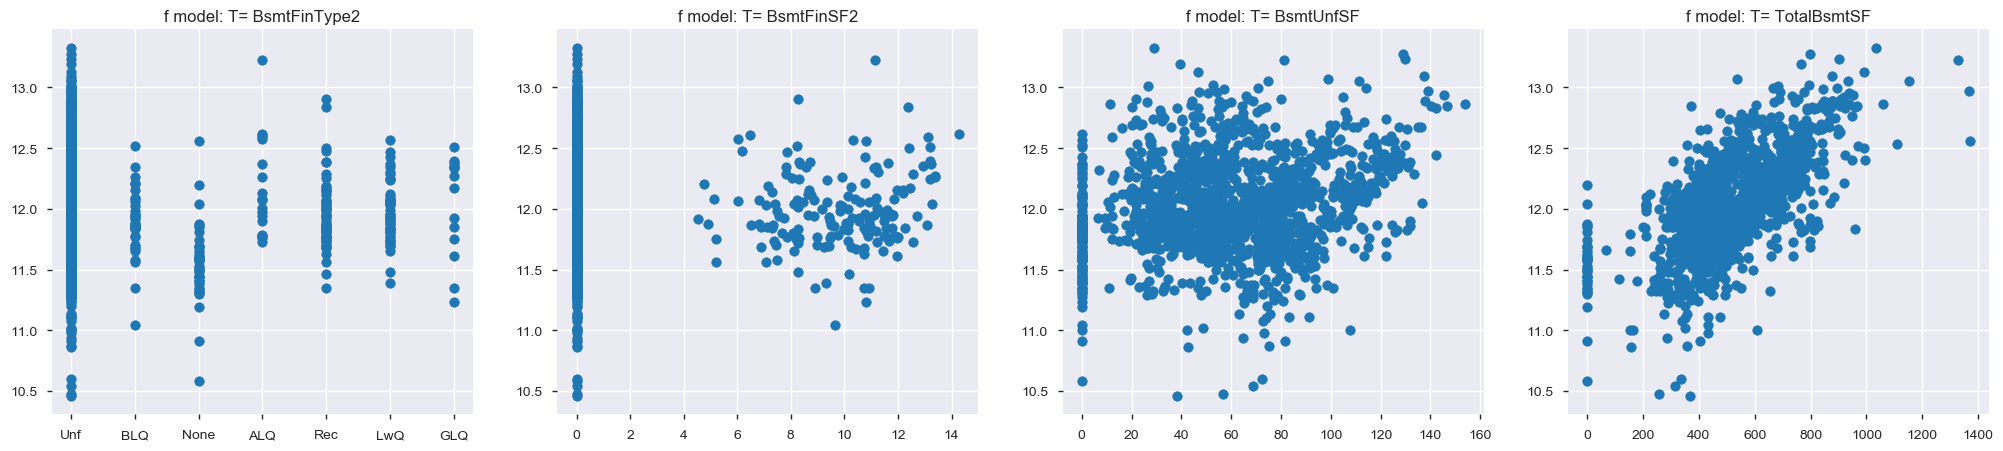

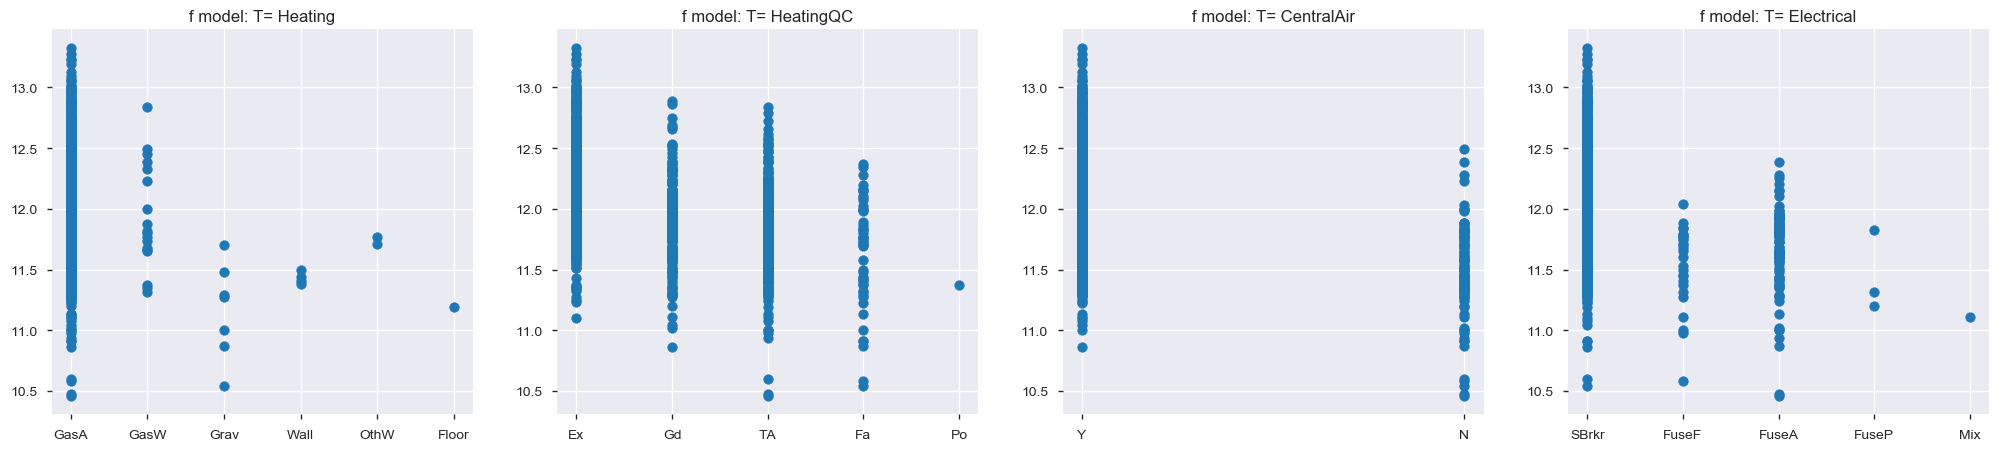

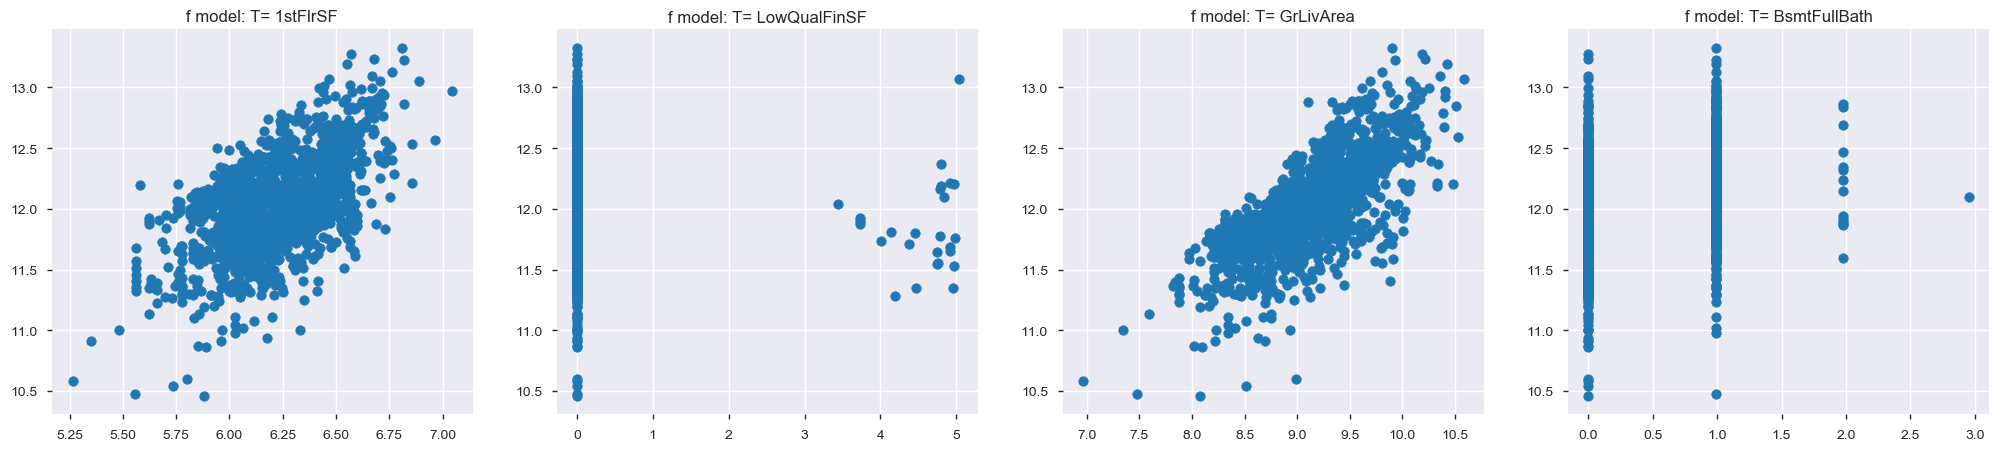

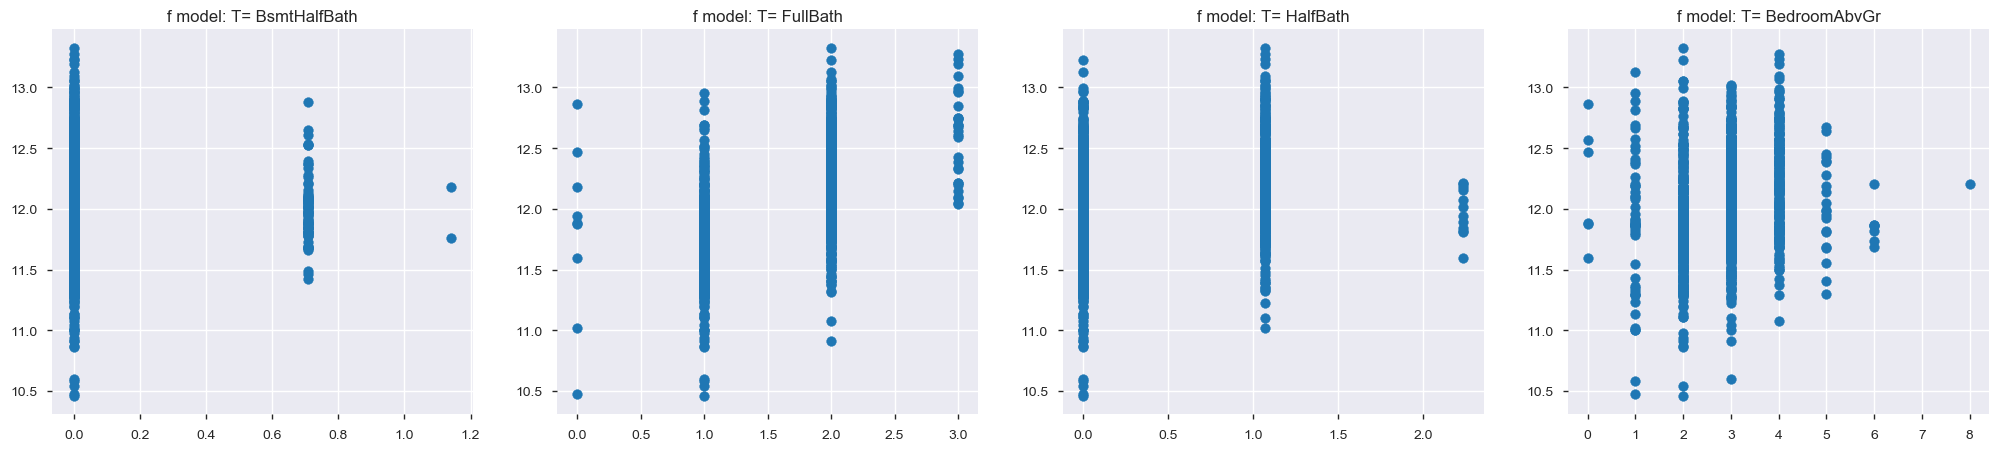

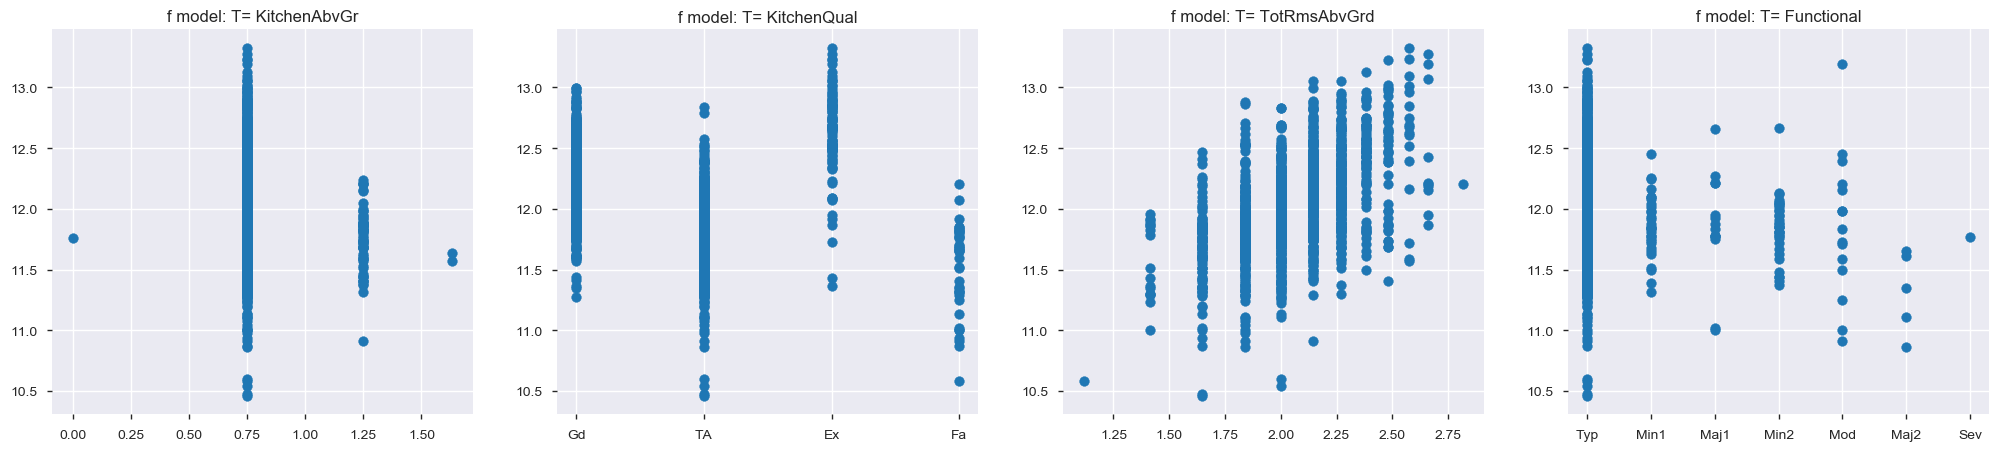

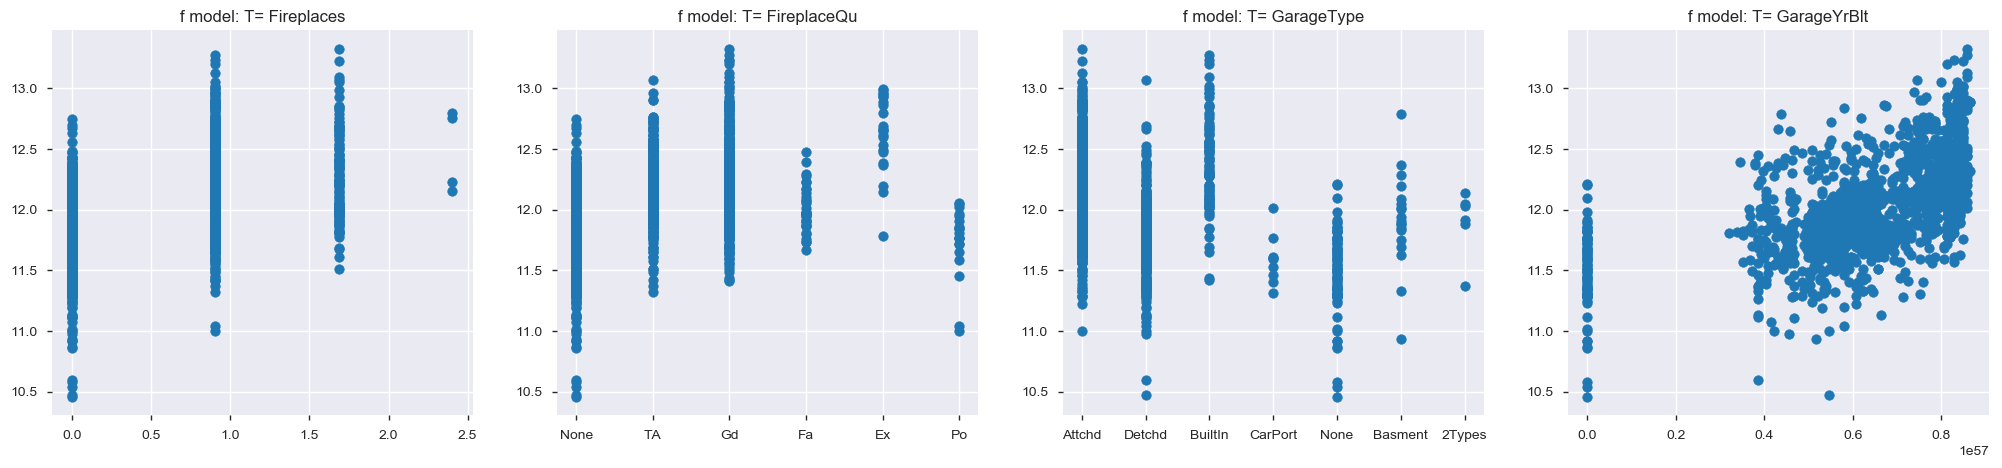

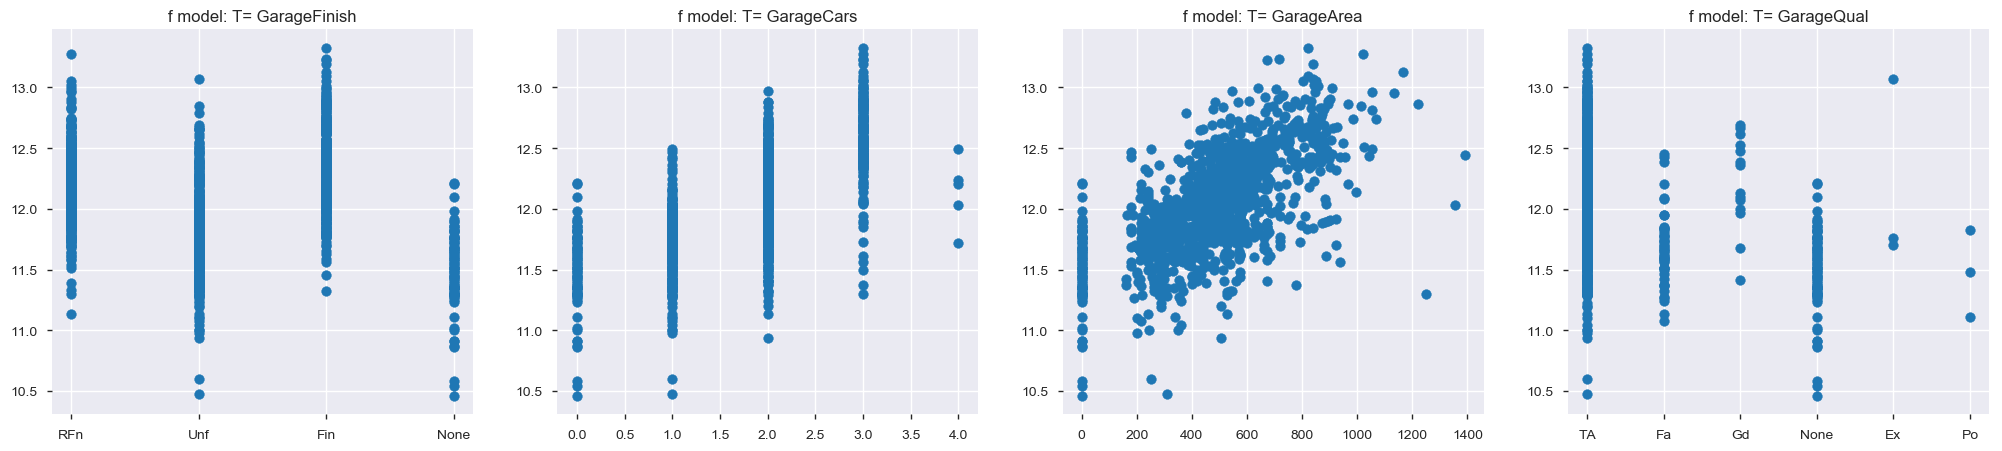

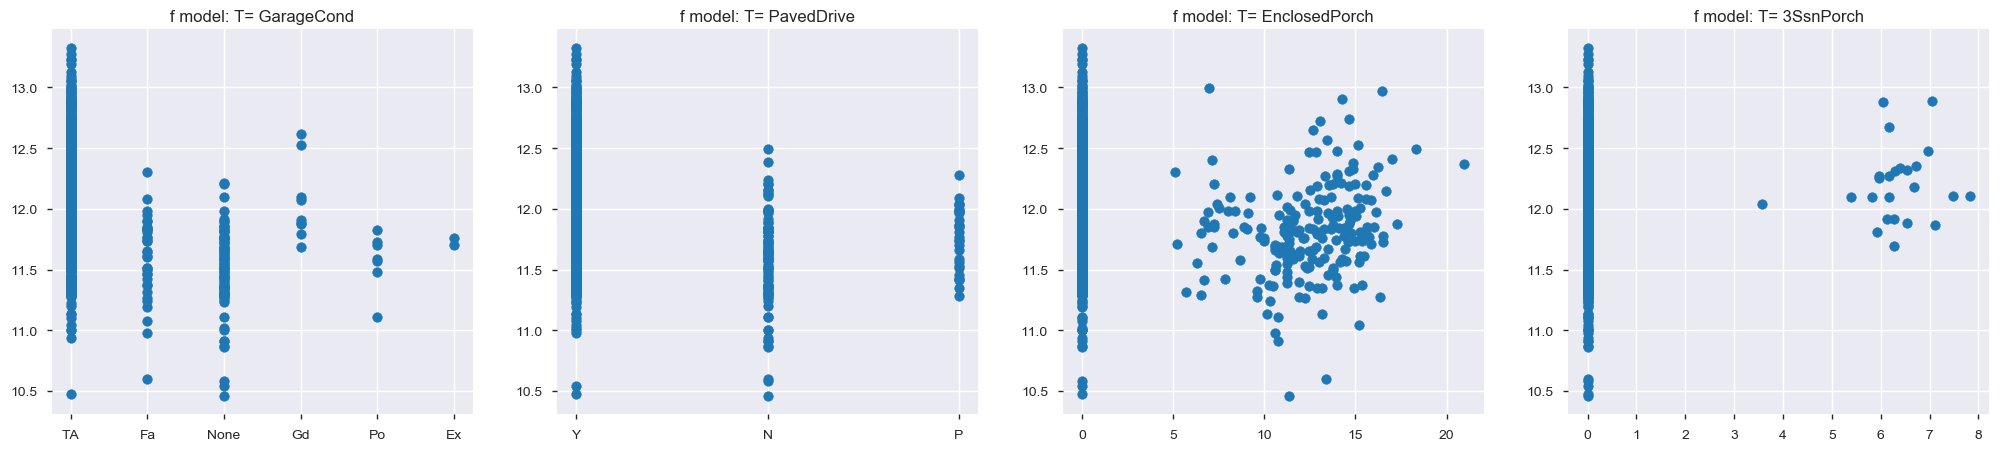

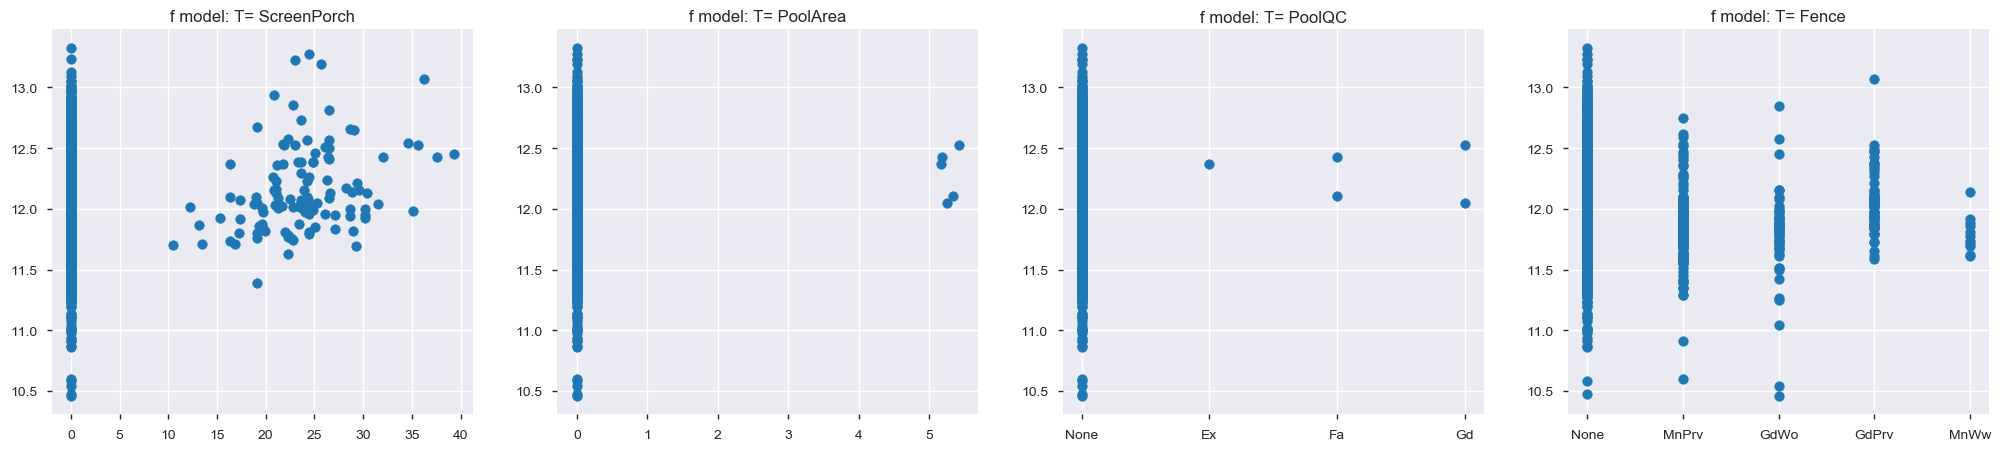

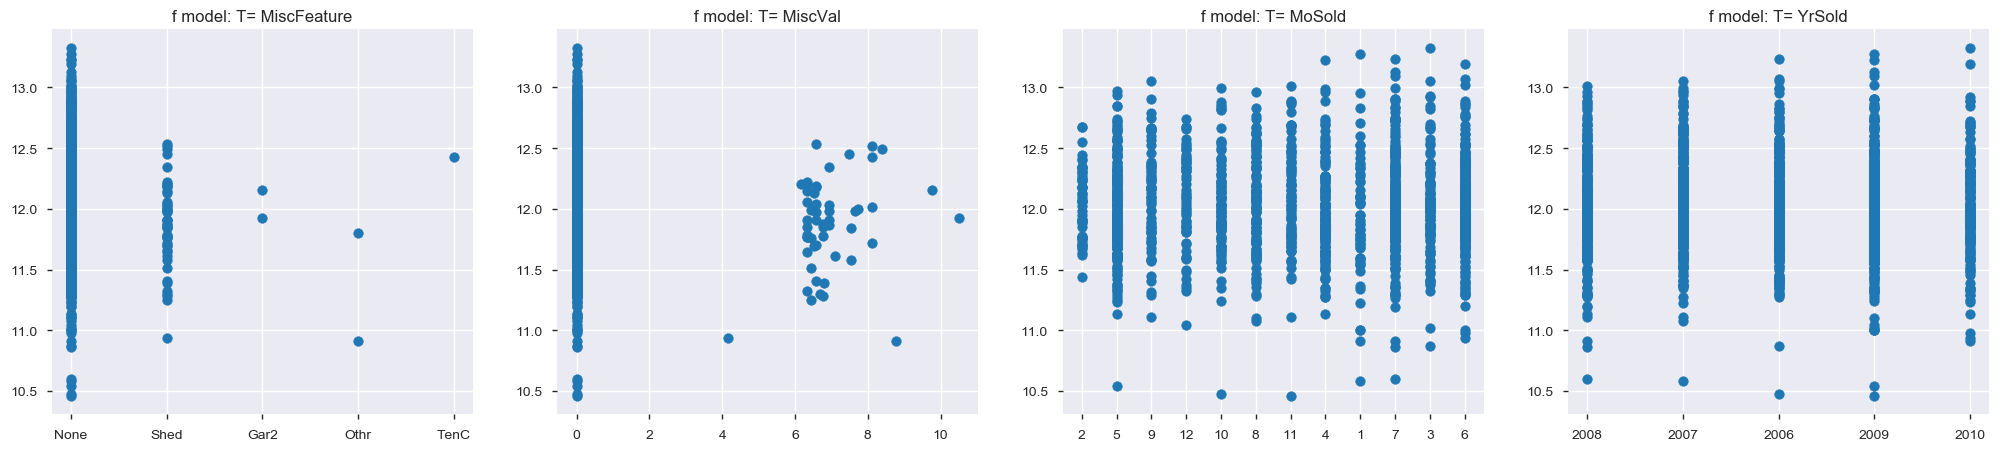

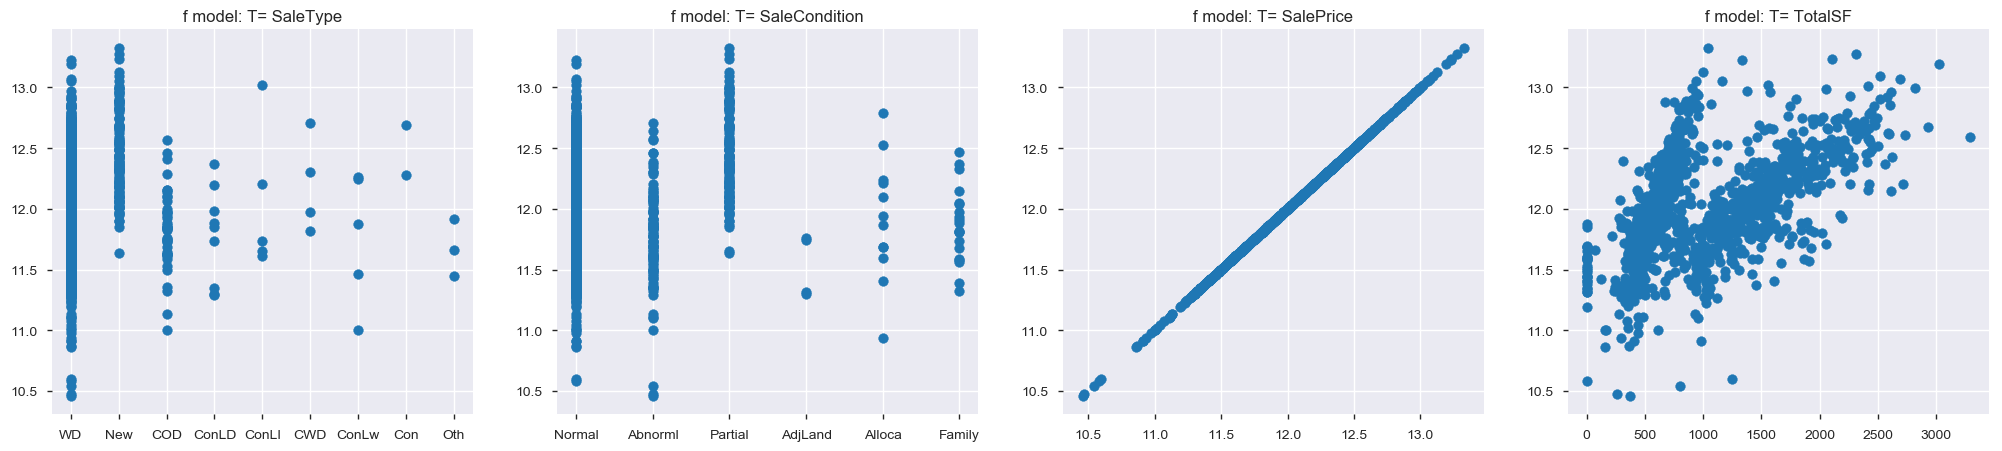

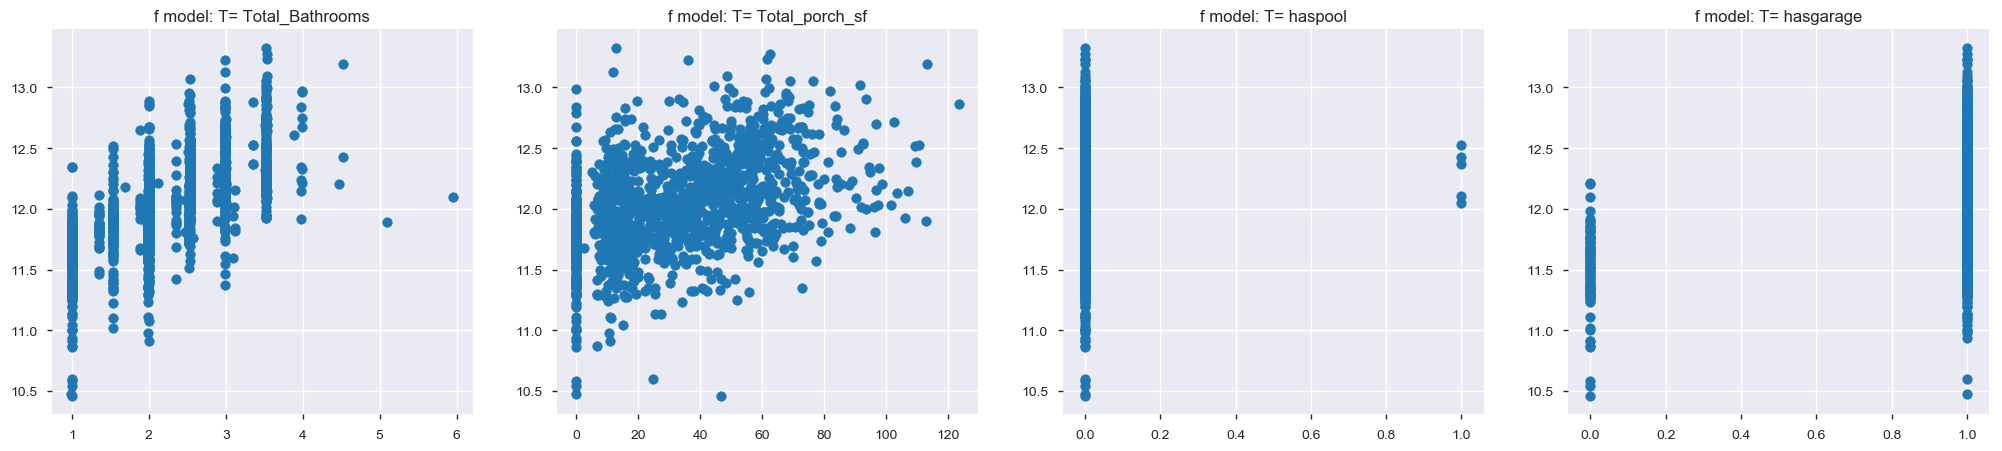

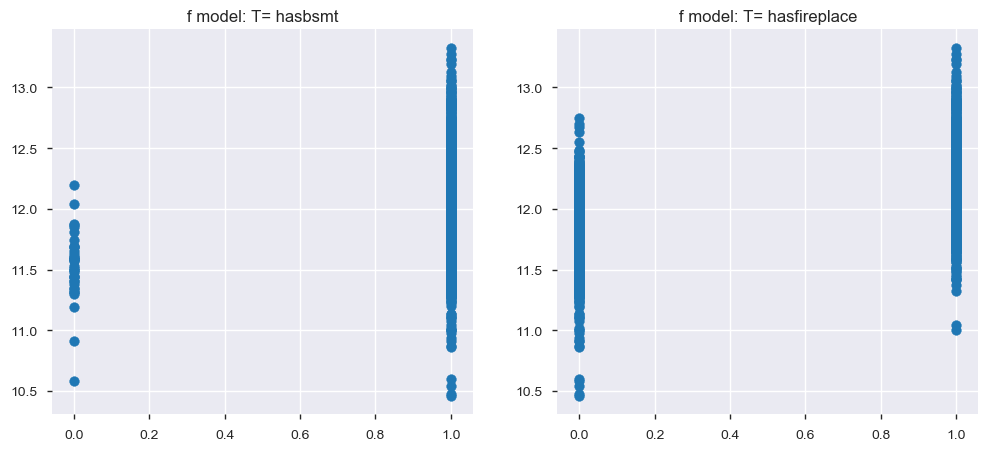

In [26]:
vars = data_features.columns
# vars = numerical_features
figures_per_time = 4
count = 0 
y = y_train
for var in vars:
    x = train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1

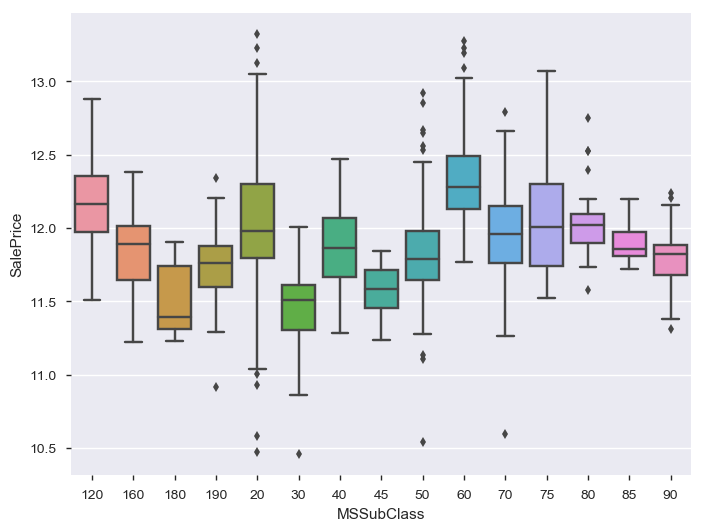

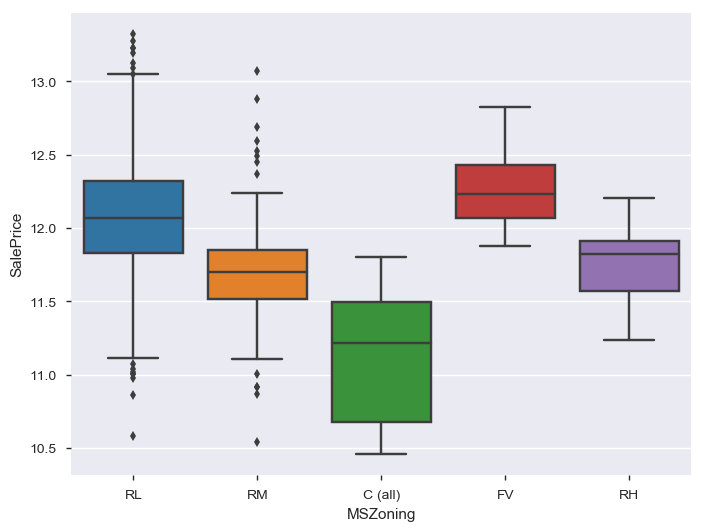

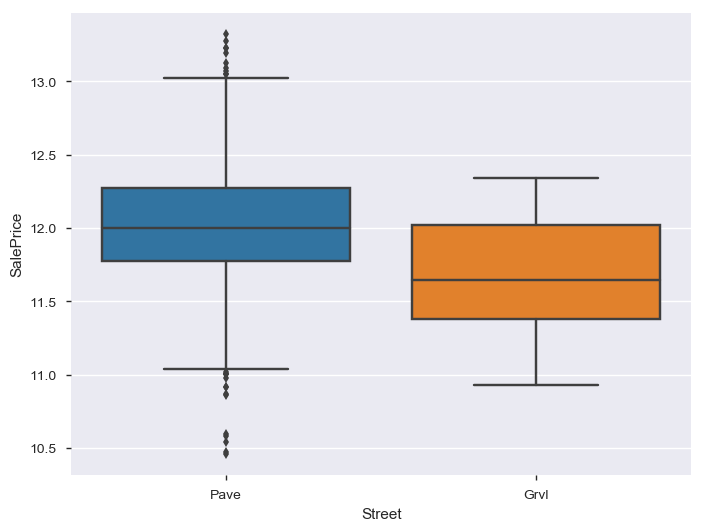

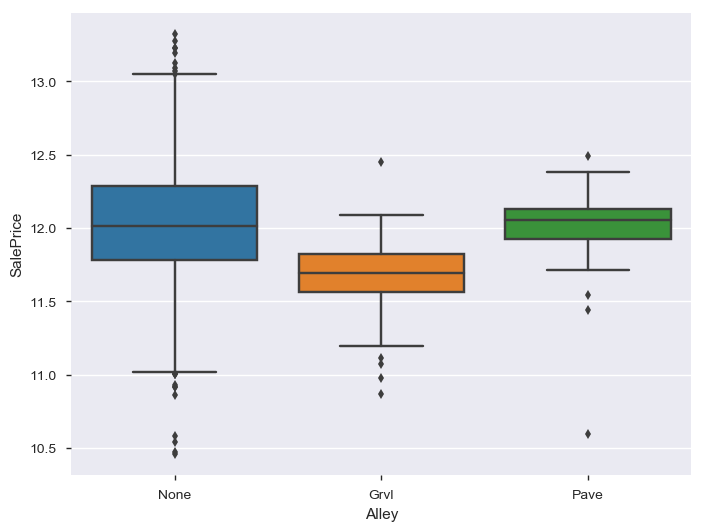

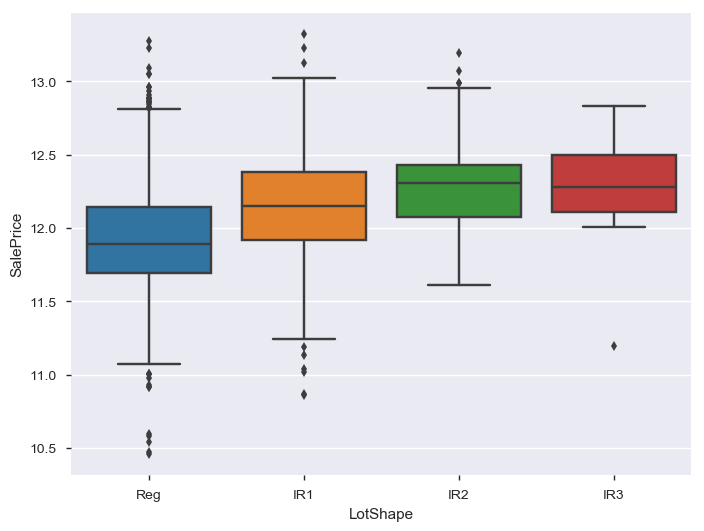

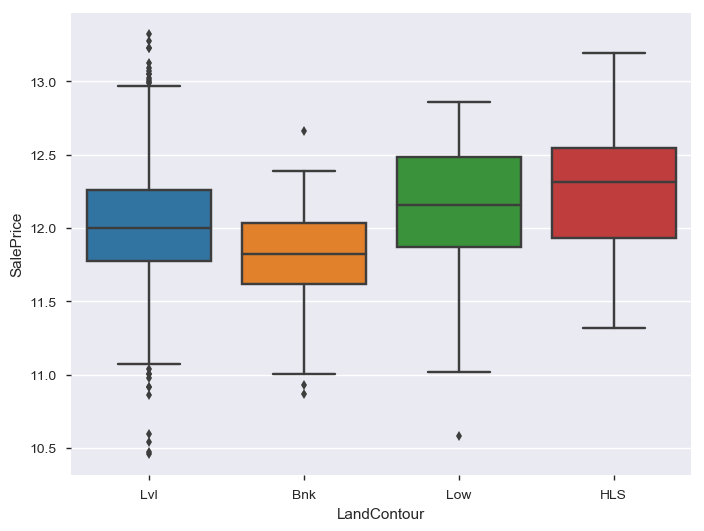

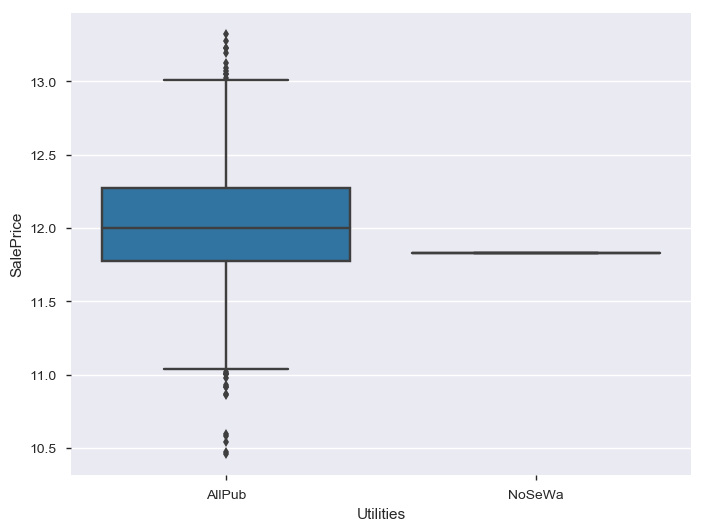

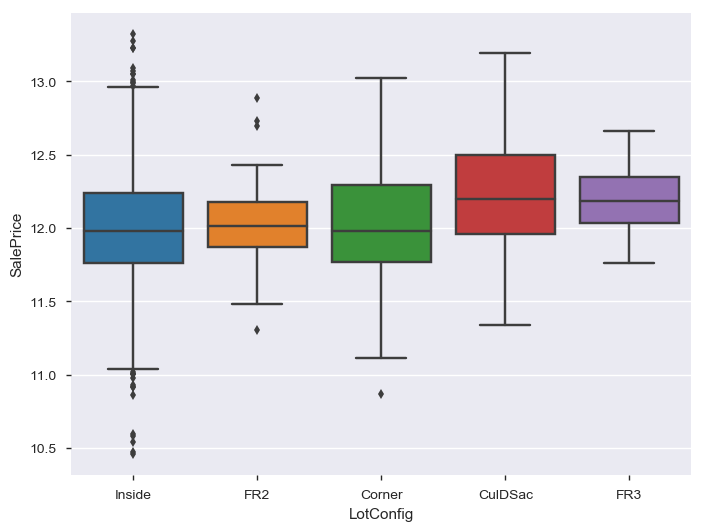

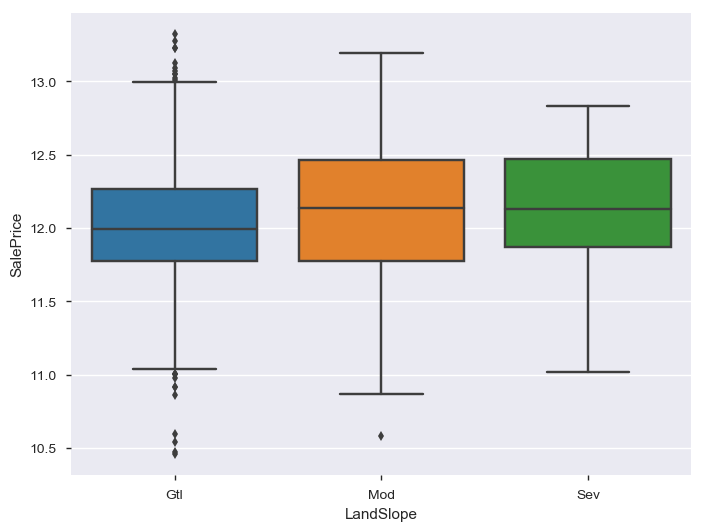

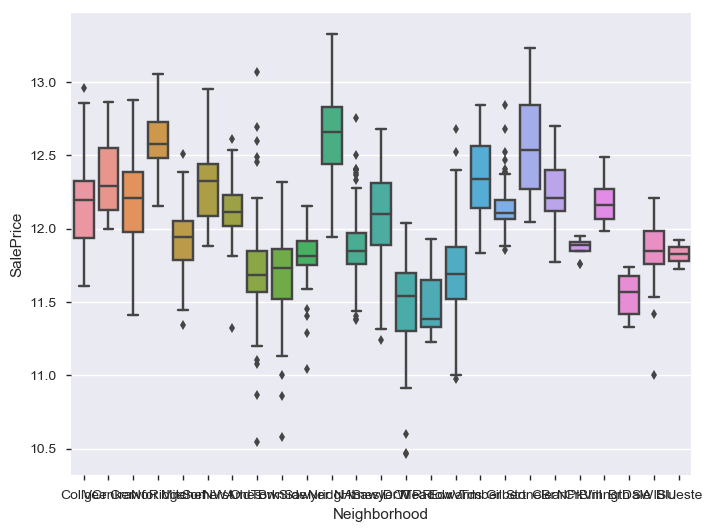

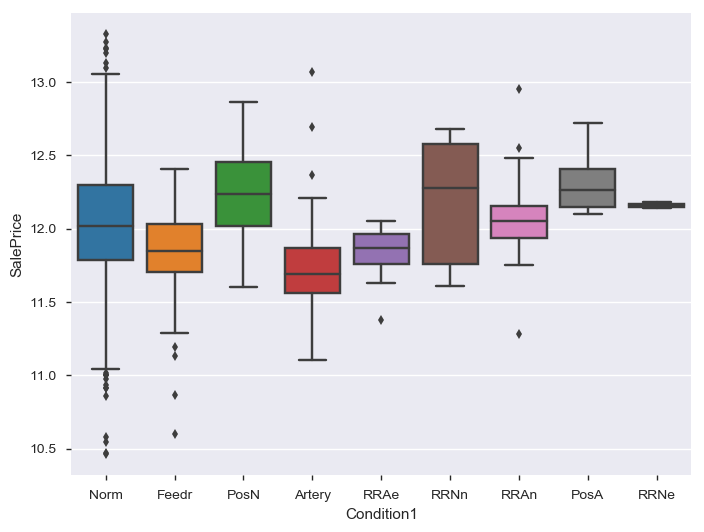

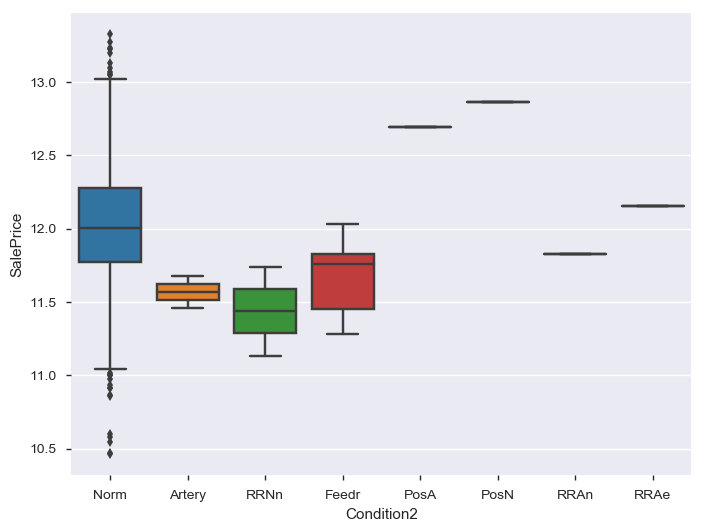

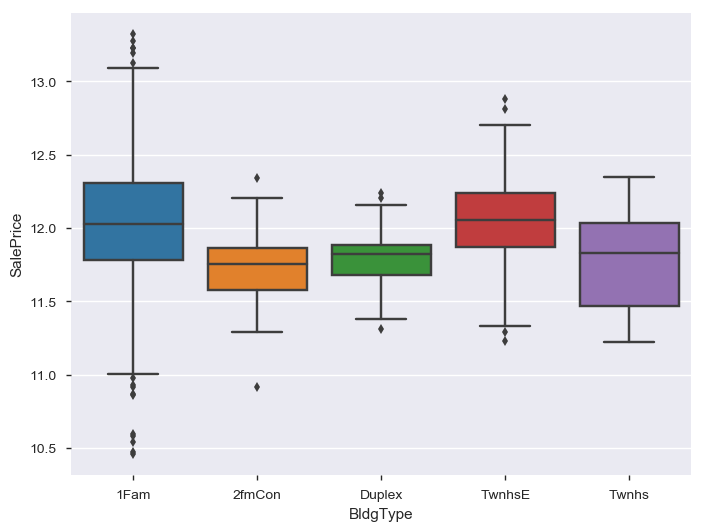

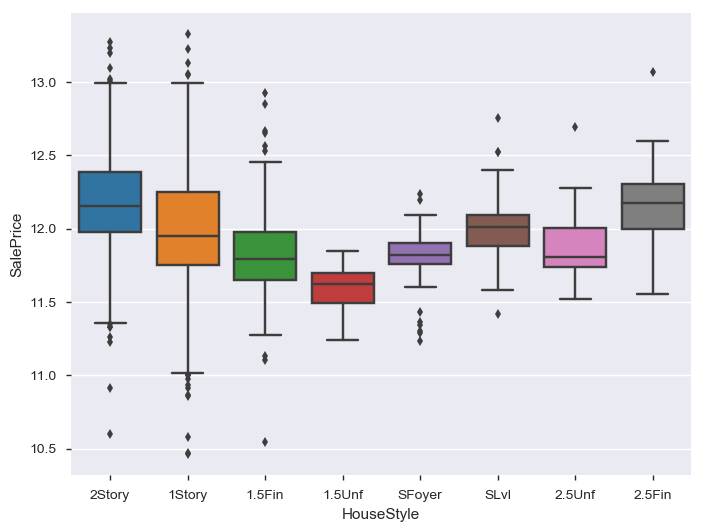

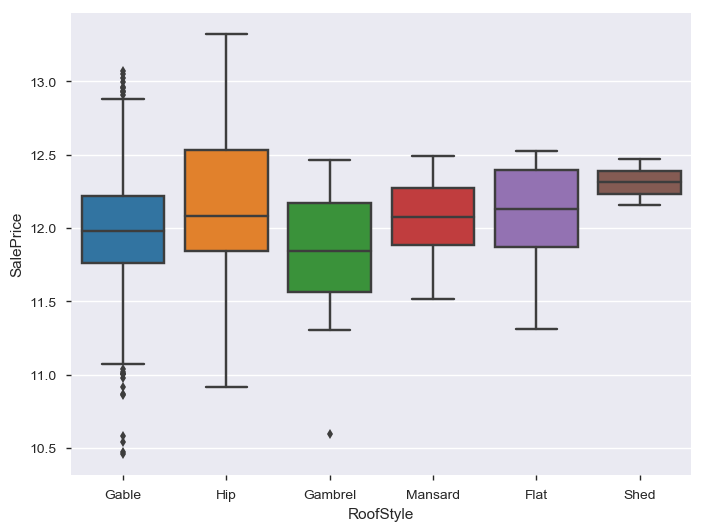

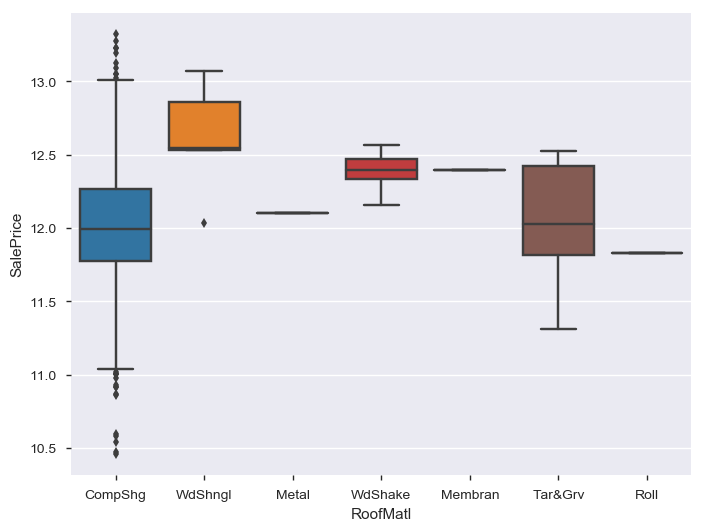

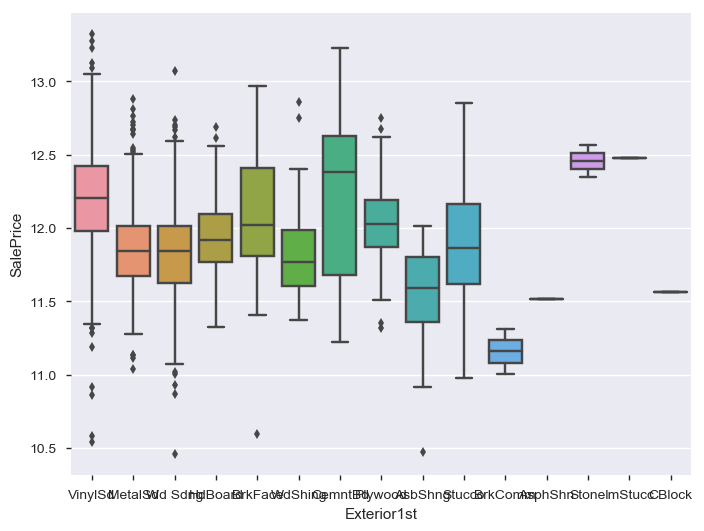

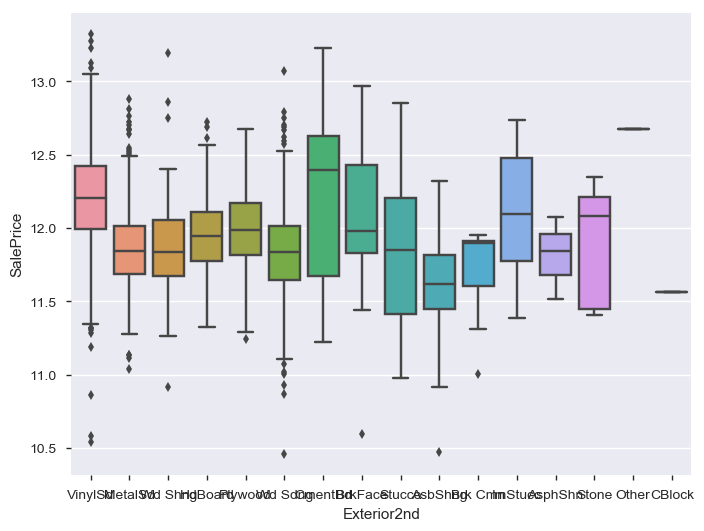

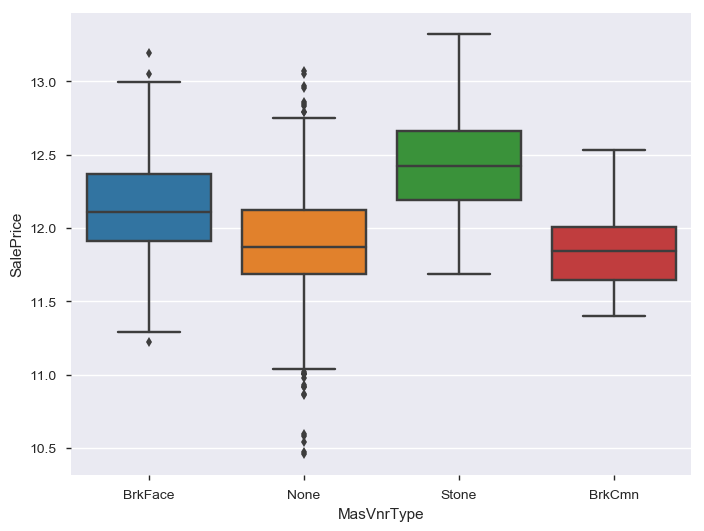

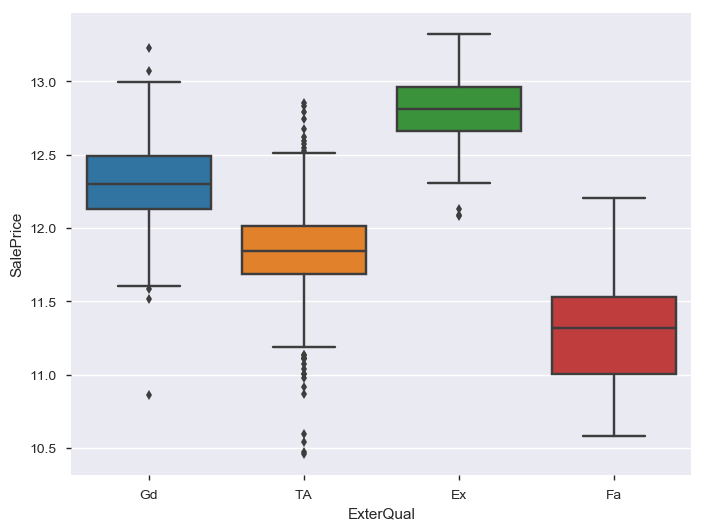

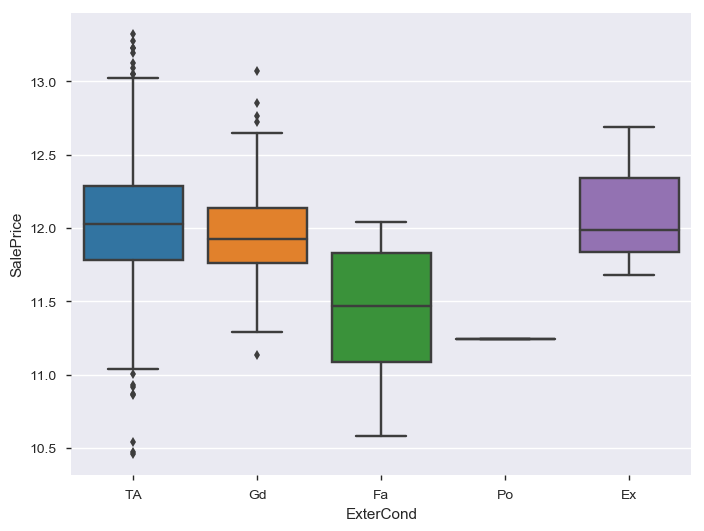

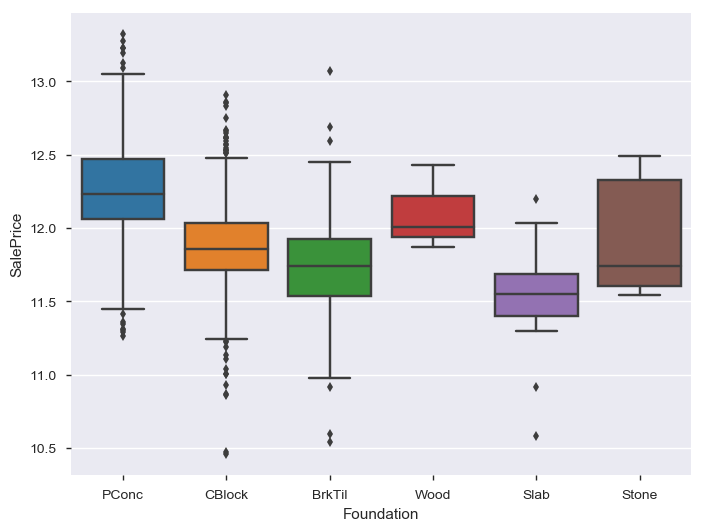

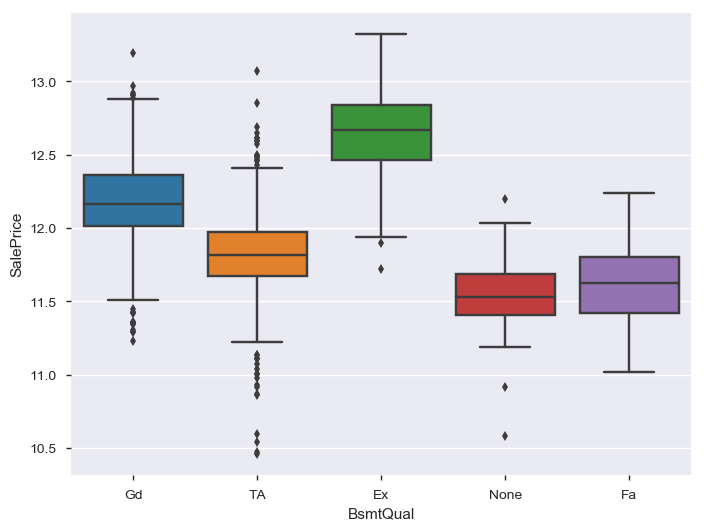

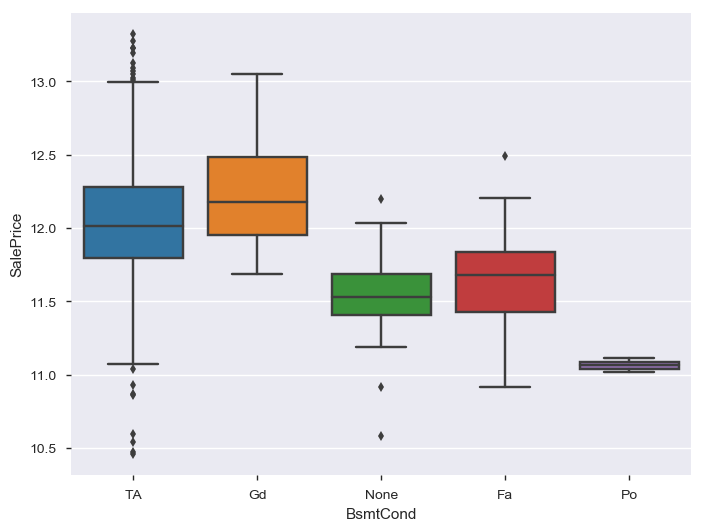

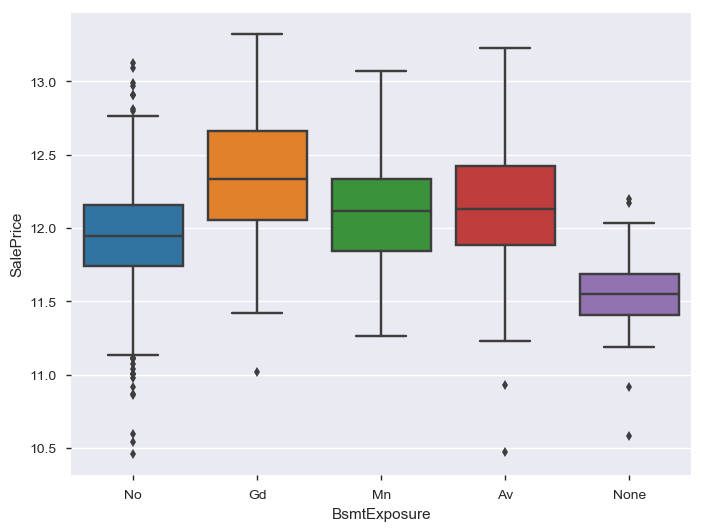

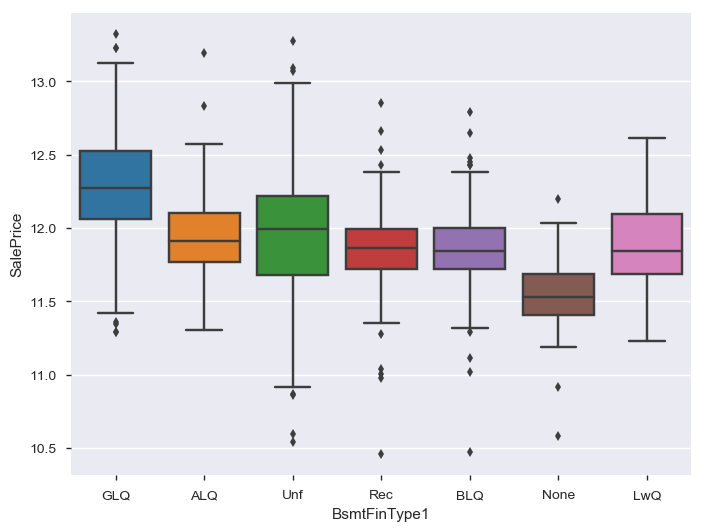

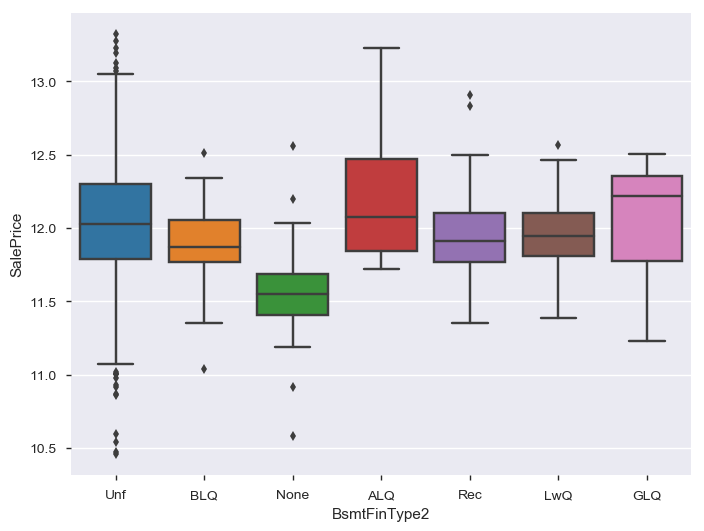

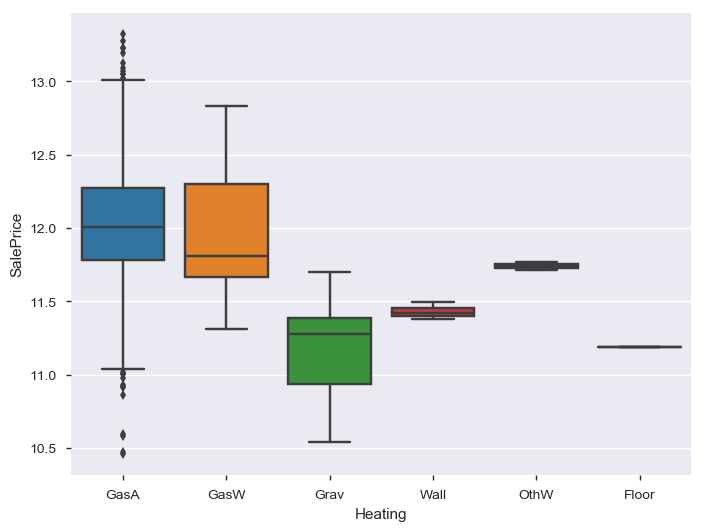

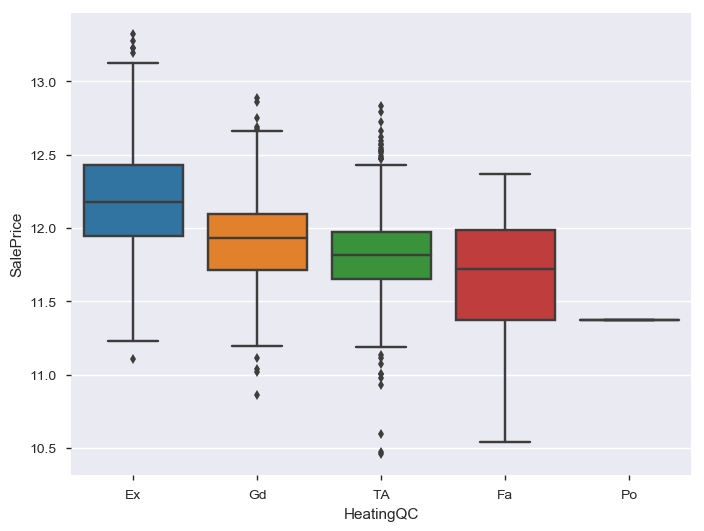

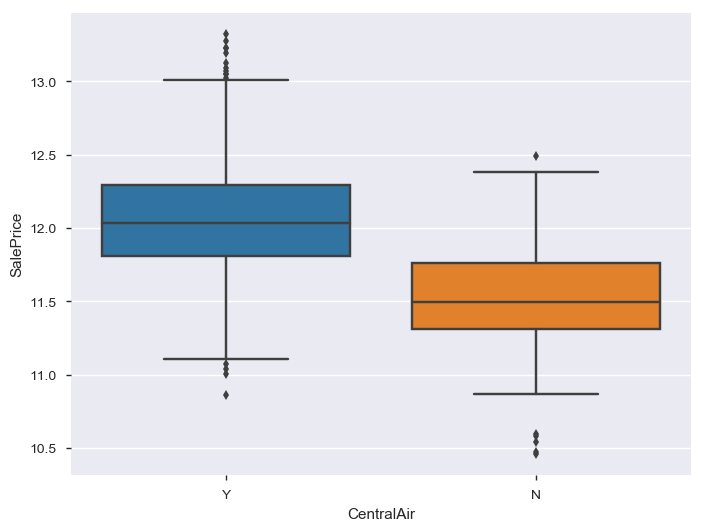

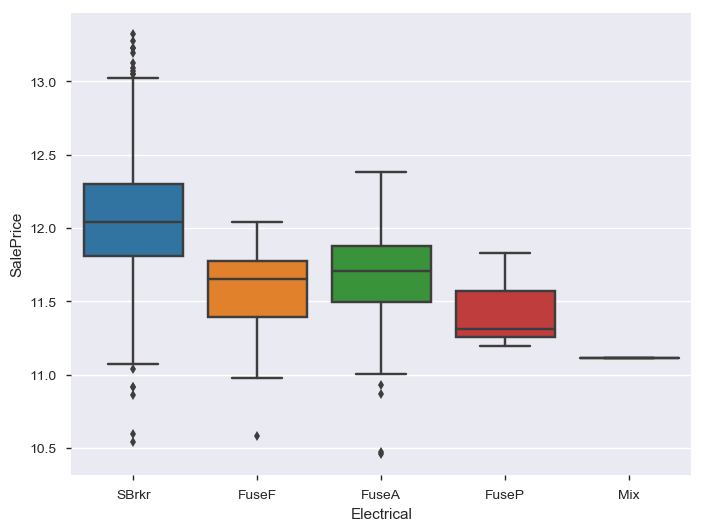

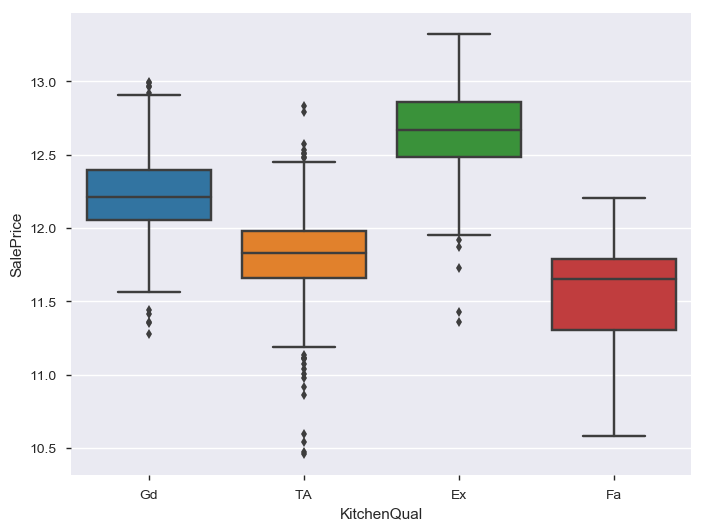

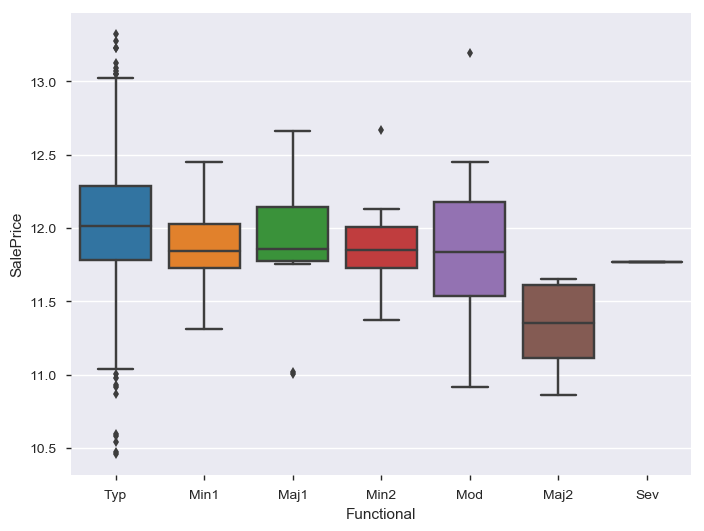

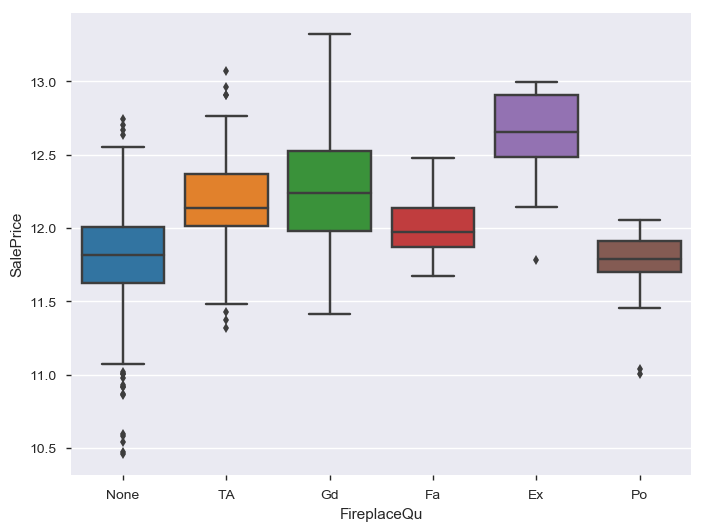

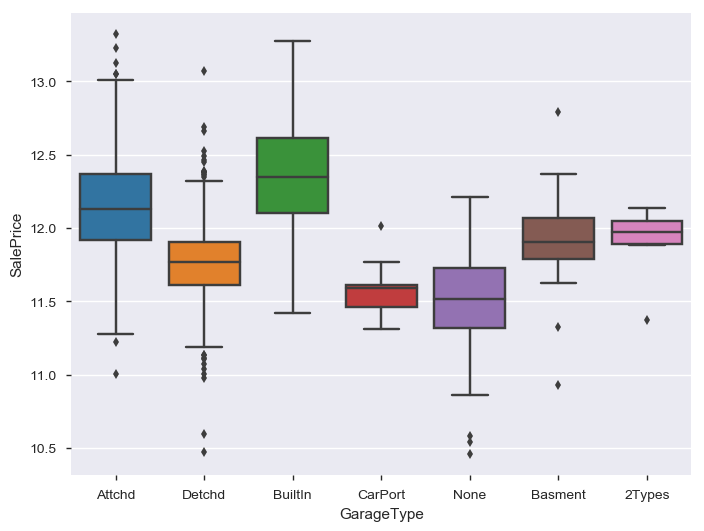

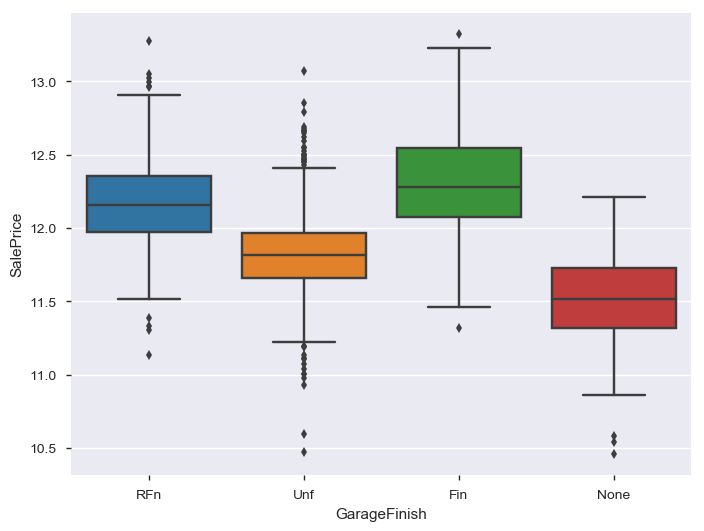

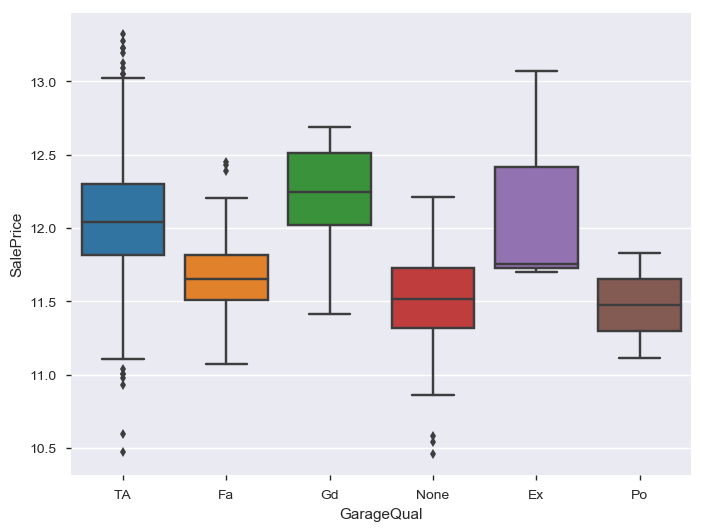

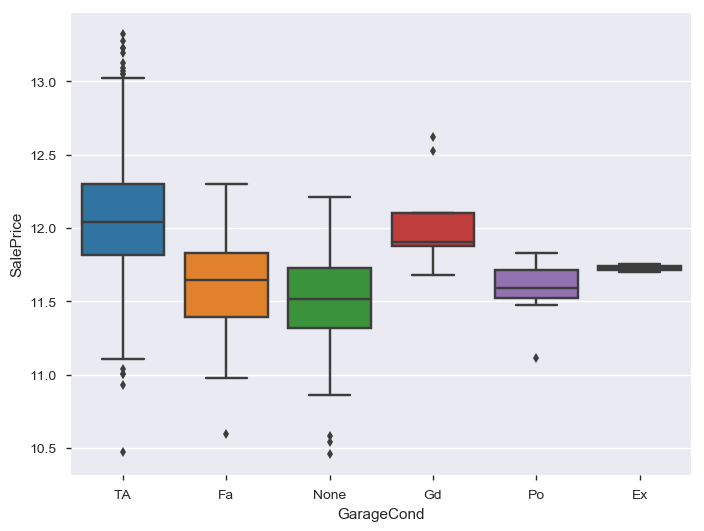

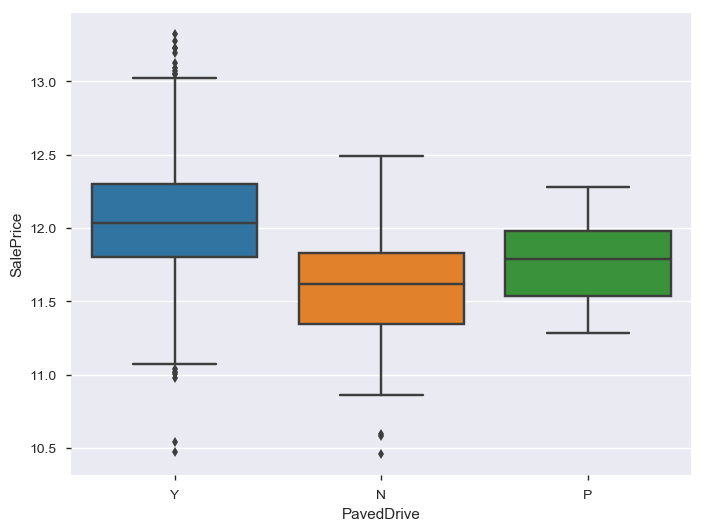

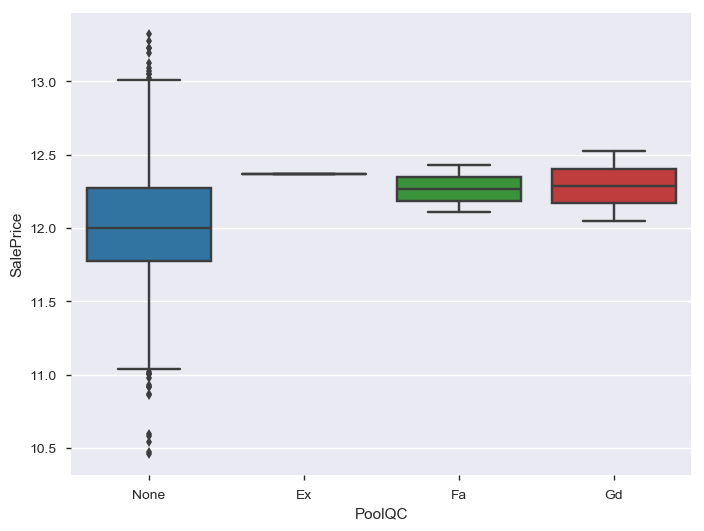

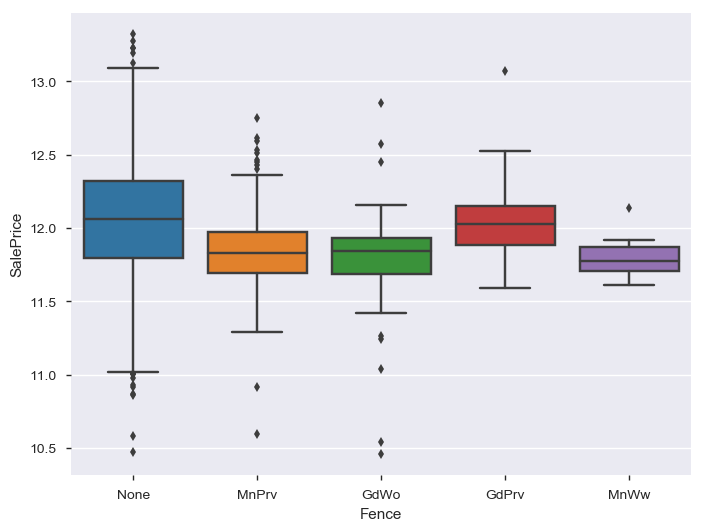

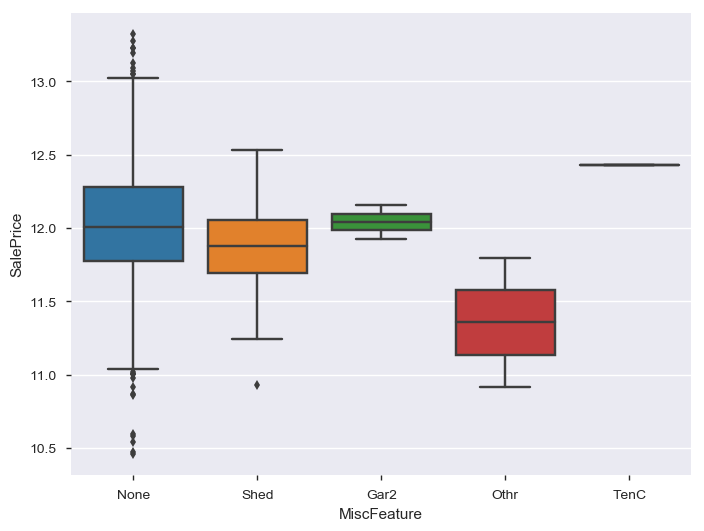

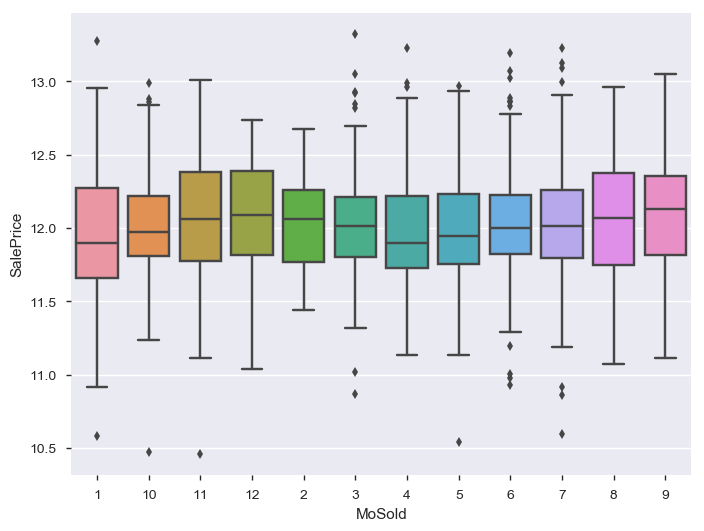

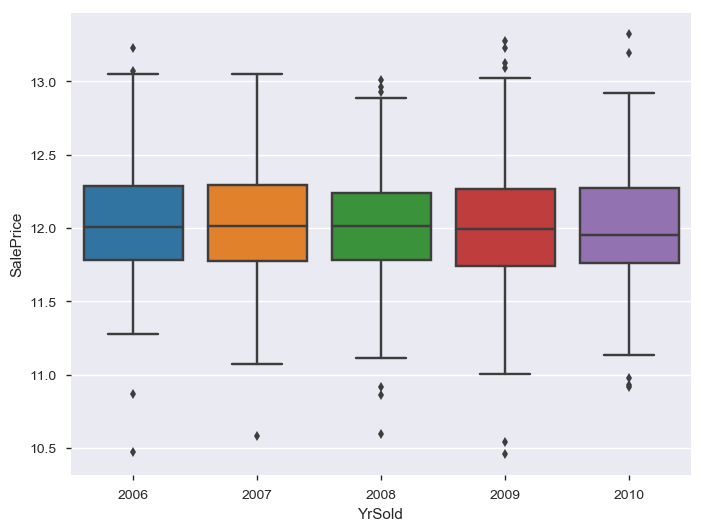

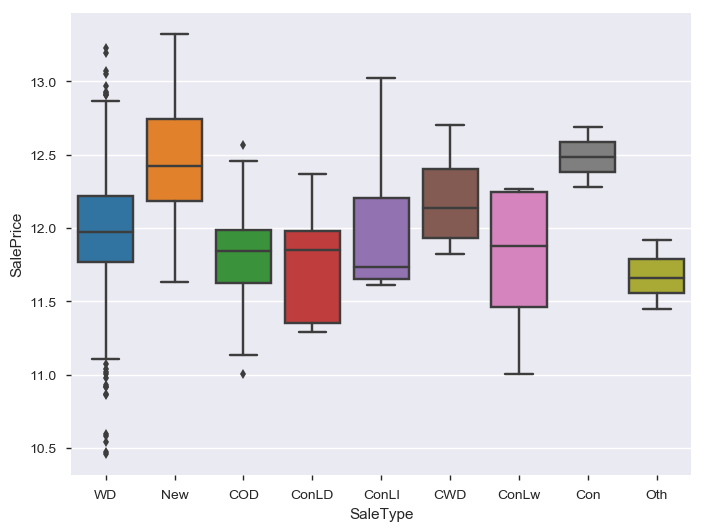

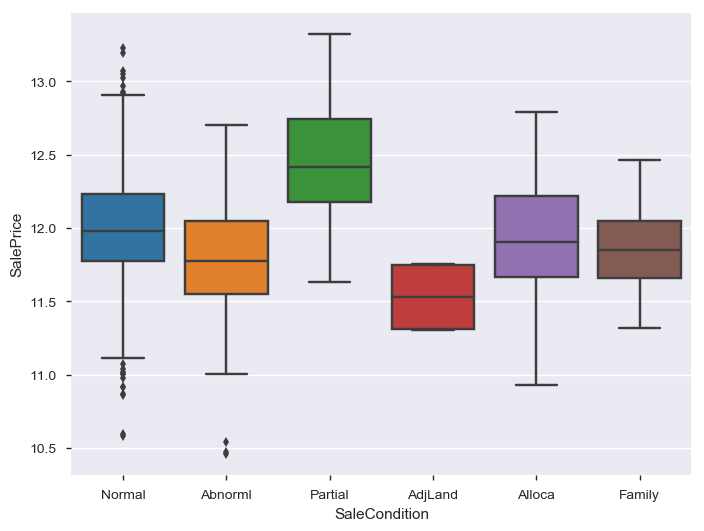

In [27]:
#Optional: Box plot
#Box plot is heavy, one can manualy choose the intresting parameters
vars_box = feat_cat
for var in vars_box:
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)

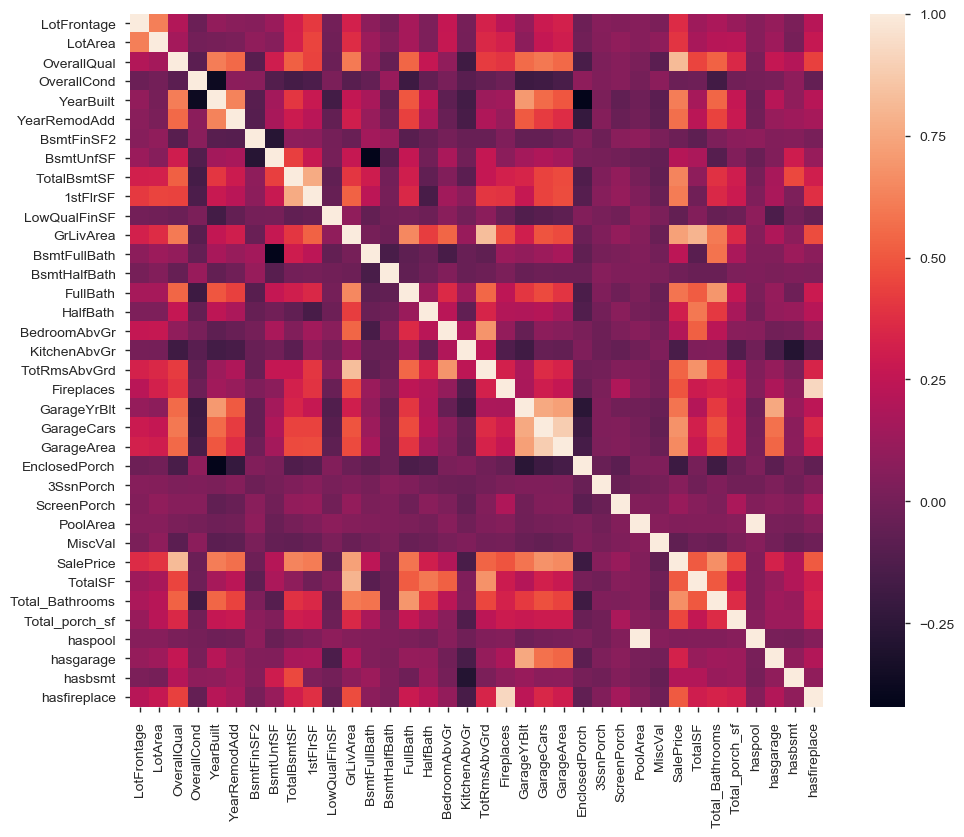

In [28]:
# Complete numerical correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

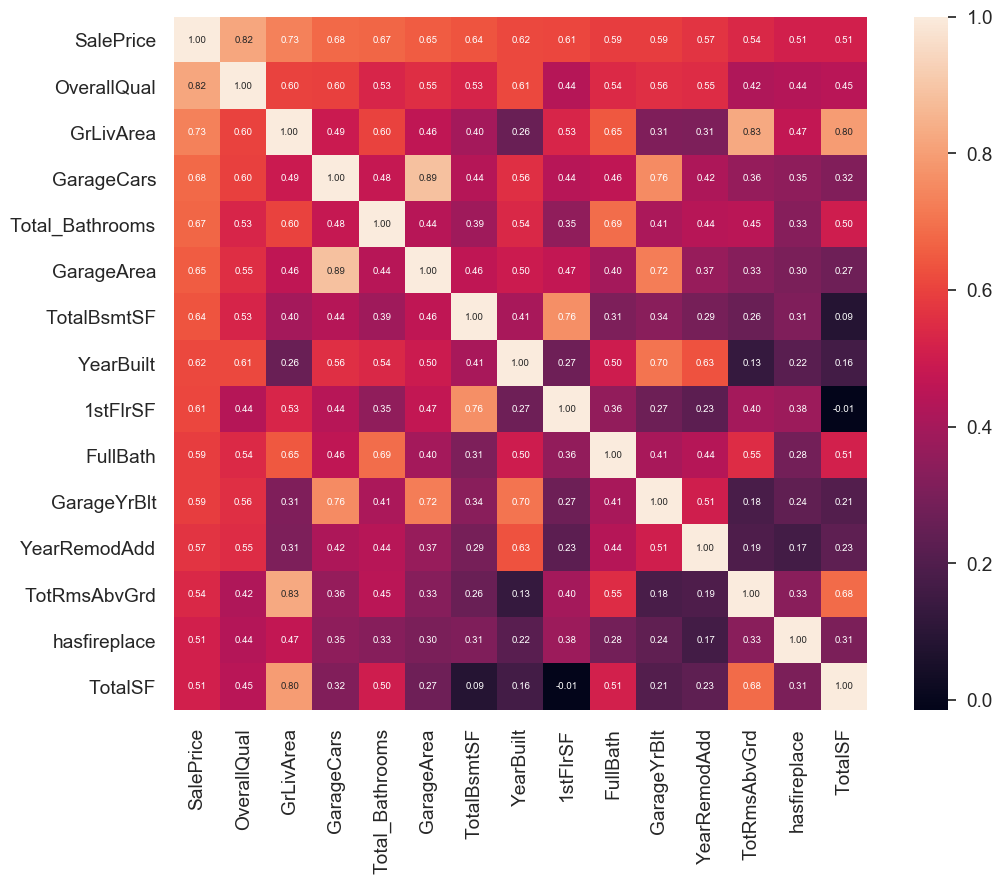

In [29]:
# saleprice correlation matrix
corr_num = 15 #number of variables for heatmap
cols_corr = corrmat.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(train[cols_corr].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(corr_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.show()

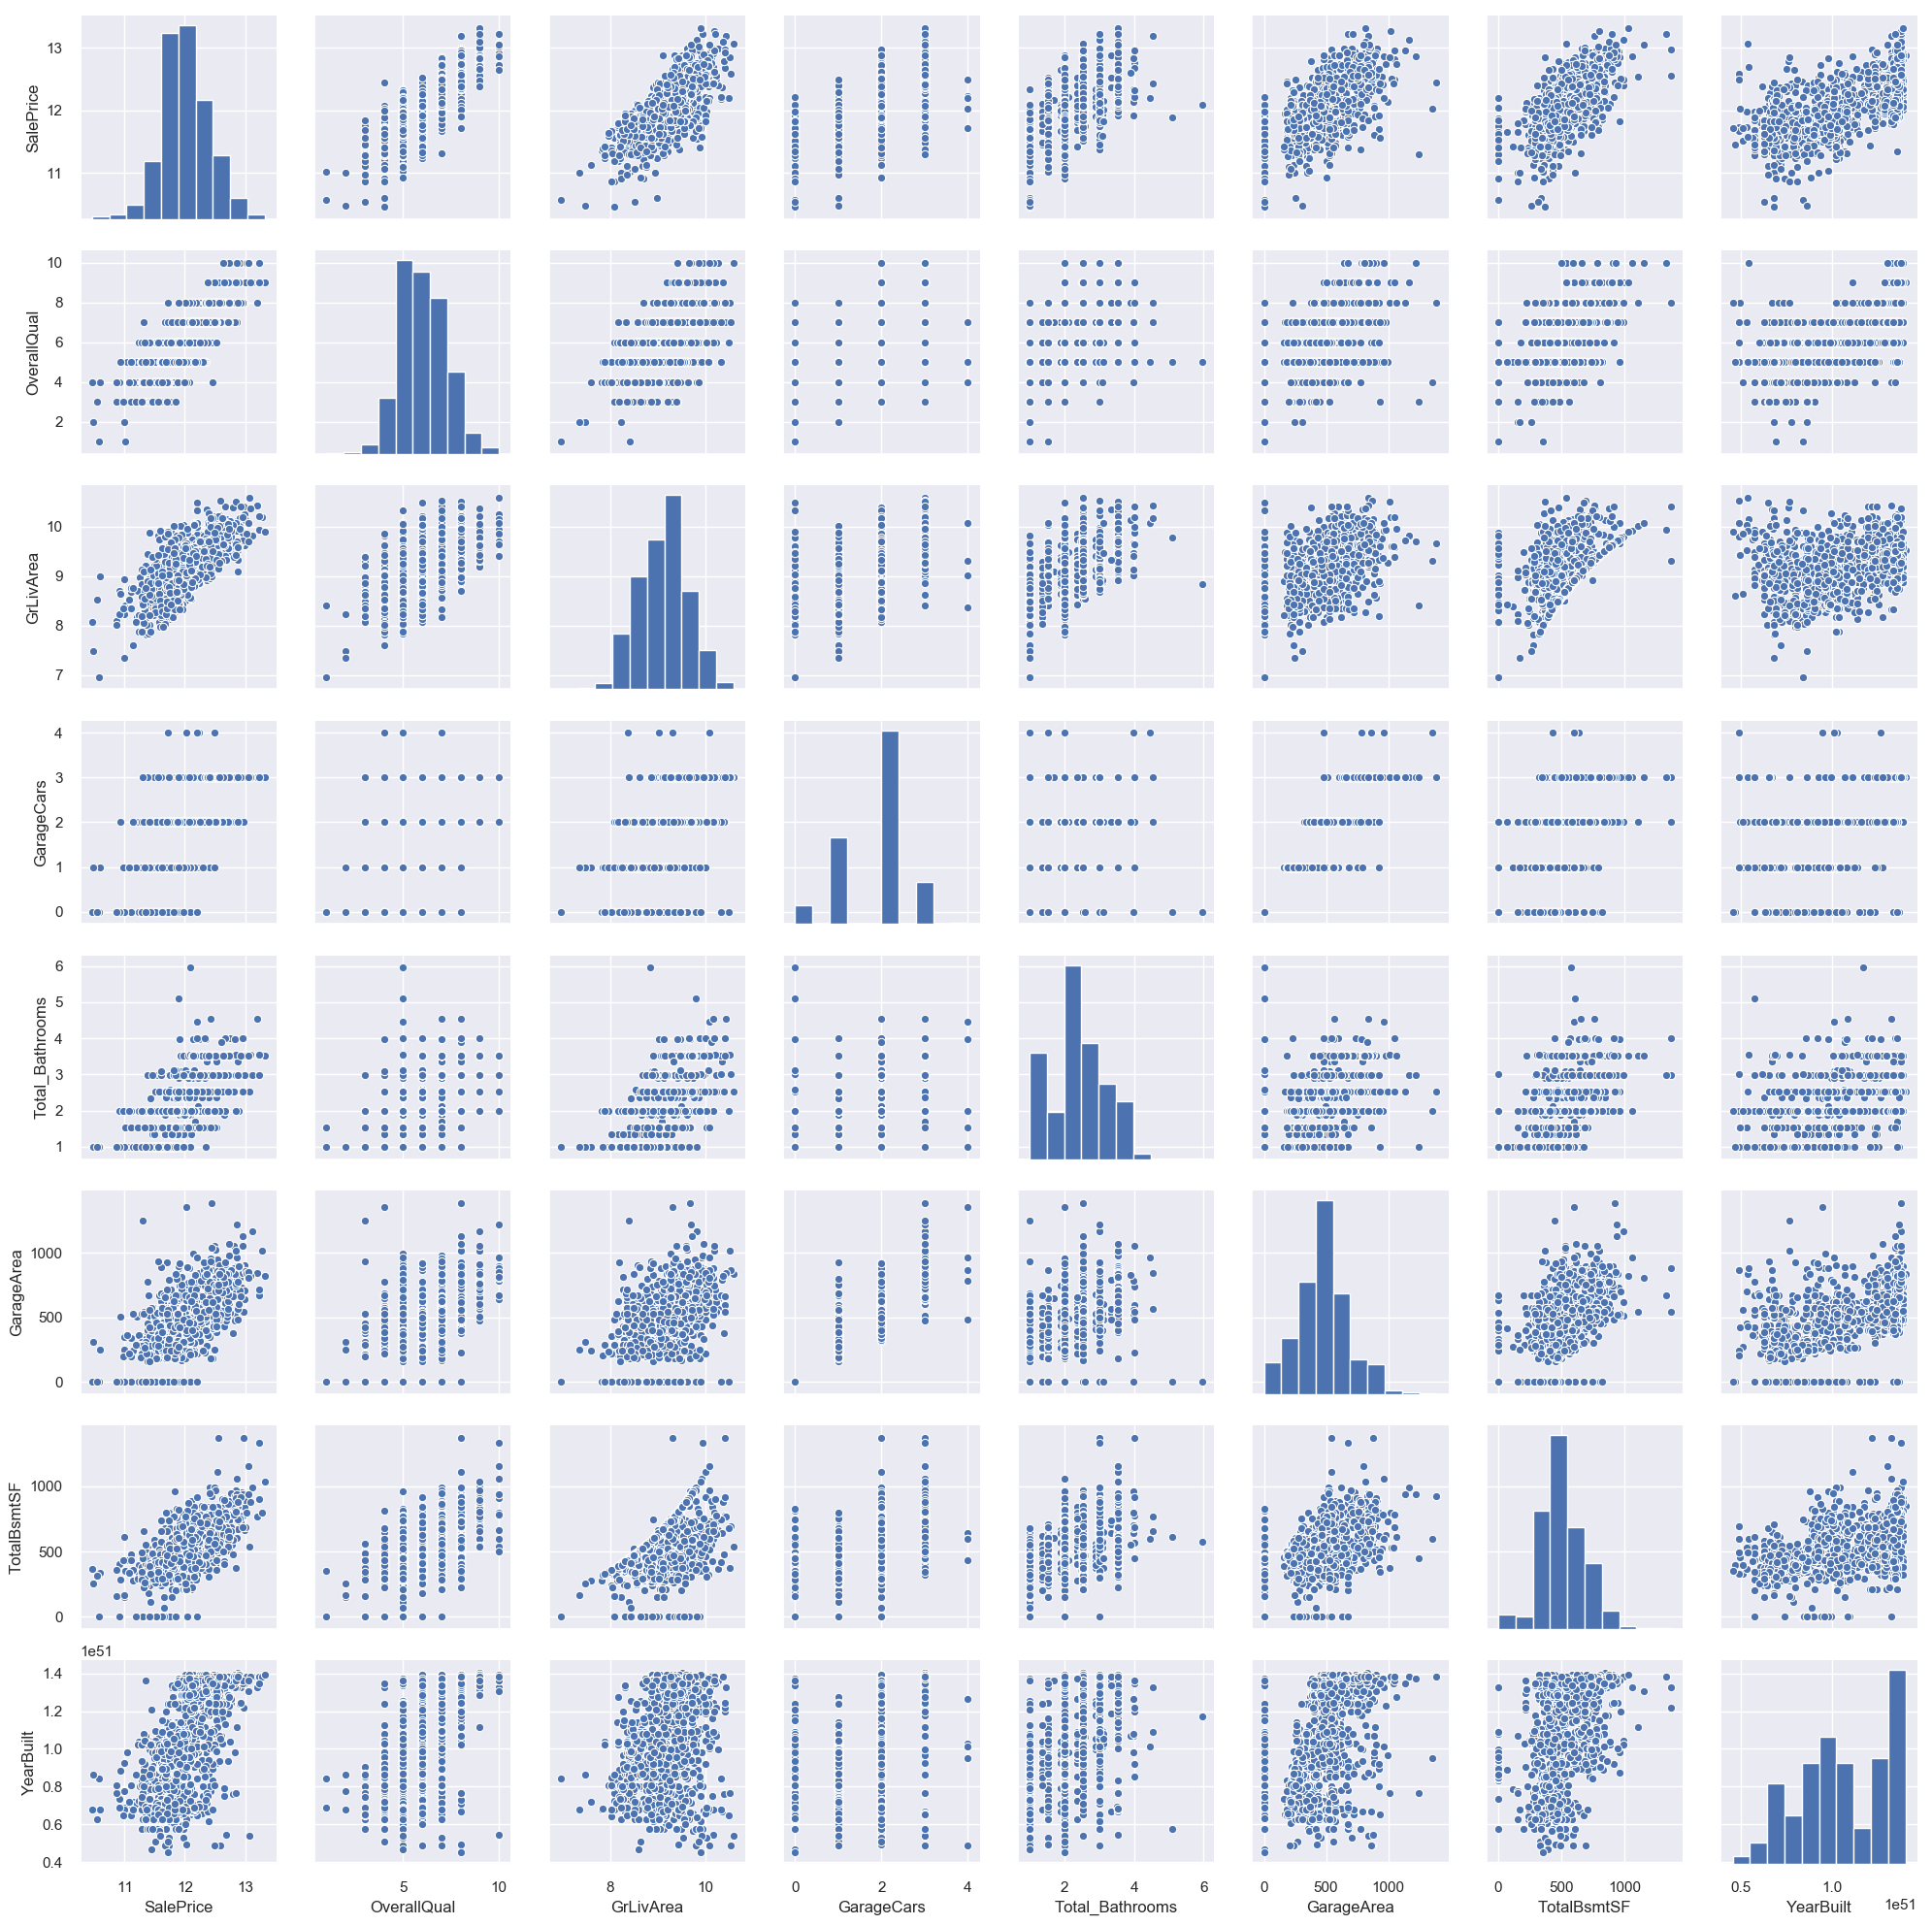

In [30]:
# pair plots for variables with largest correlation
var_num = 8
vars = cols_corr[0:var_num]
# vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.set()
sns.pairplot(train[vars], height = 2.5)
plt.show();

#Preparing the data 
#Dropping Sale price, Creating dummy variable for the categorial variables and matching dimentions between train and test

In [31]:
data_features = data_features.drop("SalePrice", axis = 1)
final_features = pd.get_dummies(data_features)

print(final_features.shape)
X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(y):, :]
print(X.shape,y_train.shape,X_test.shape)


(2914, 334)
(1455, 334) (1455,) (1459, 334)


In [32]:
# Removes colums where the threshold of zero's is (> 99.95), means has only zero values 
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.95:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_test = X_test.drop(overfit, axis=1).copy()

print(X.shape,y_train.shape,X_test.shape)

(1455, 331) (1455,) (1459, 331)


In [33]:
!pip install lightgbm

In [34]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [37]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

# model scoring  and validation function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [38]:
# lightgbm = LGBMRegressor(objective='regression', 
#                                        num_leaves=5, #was 4
#                                        learning_rate=0.01, 
#                                        n_estimators=5000,
#                                        max_bin=200, 
#                                        bagging_fraction=0.75,
#                                        bagging_freq=5, 
#                                        bagging_seed=7,
#                                        feature_fraction=0.2,
#                                        feature_fraction_seed=7,
#                                        verbose=-1,
#                                        )

# xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)



# setup models hyperparameters using a pipline
# The purpose of the pipeline is to assemble several steps that can be cross-validated together, while setting different parameters.
# This is a range of values that the model considers each time in runs a CV
# e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
# e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
# alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
# alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

e_alphas = [0.0002, 0.0003, 0.0005, 0.0006]
e_l1ratio = [0.85, 0.92, 0.99]
alphas_alt = [14.6, 14.7,15, 15.1, 15.3, 15.4]
alphas2 = [0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007]

# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))


# stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,xgboost, lightgbm),
#                                 meta_regressor=xgboost,
#                                 use_features_in_secondary=True)

# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet}
#           'lightgbm': lightgbm,
#           'xgboost': xgboost}
predictions = {}
scores = {}

In [39]:
for name, model in models.items():
    
    model.fit(X, y)
    predictions[name] = np.expm1(model.predict(X))
    
    score = cv_rmse(model, X=X)
    scores[name] = (score.mean(), score.std())

In [40]:
# get the performance of each model on training data(validation set)
print('---- Score with CV_RMSLE-----')
score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# score = cv_rmse(lightgbm)
# print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# score = cv_rmse(xgboost)
# print("xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


#Fit the training data X, y
print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(X, y)
print('Lasso')
lasso_model = lasso.fit(X, y)
print('Ridge')
ridge_model = ridge.fit(X, y)
# print('xgboost')
# xgb_model_full_data = xgboost.fit(X, y)
# print('lightgbm')
# lgb_model_full_data = lightgbm.fit(X, y)

# print('stack_gen')
# stack_gen_model = stack_gen.fit(np.array(X), np.array(y))


---- Score with CV_RMSLE-----
Ridge score: 0.1106 (0.0122)

Lasso score: 0.1107 (0.0127)

ElasticNet score: 0.1109 (0.0128)

----START Fit---- 2019-06-25 17:28:57.056330
Elasticnet
Lasso
Ridge
